<a href="https://colab.research.google.com/github/vy-phung/Bioinformatics/blob/master/Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Bioinformatics I: Finding hidden message </h1>**



## Frequent pattern


In [ ]:
def pattern_count(text,k):
  fre = {}
  com_pat = []
  for i in range(0,len(text)-k+1):
    if text[i:k+i] not in fre:
       fre[text[i:k+i]] = 0
    fre[text[i:k+i]] += 1
  for key in fre:
    if fre[key]==max(list(fre.values())):
       com_pat.append(key)
  print(com_pat)    

In [ ]:
pattern_count("CGCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCT", 3)

['CCT']


In [ ]:
text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"

In [ ]:
pattern_count(text,9)

['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat']


## Reverse

In [ ]:
def reverse(text):
  rev = []
  for i in text:
    if i == "A":
      rev.append("T")
    elif i == "T":
      rev.append("A")
    elif i == "C":
      rev.append("G")
    elif i == "G":
      rev.append("C")
  r = ''.join(rev)
  reverse = []
  for i in range(0,len(r)):
    l = len(r)-i-1
    reverse.append(r[len(r)-i-1])
  print("".join(reverse))          

In [ ]:
reverse("GCTAGCT")

AGCTAGC


## Pattern Matching

In [ ]:
def pattern_match(text,pattern):
  k = len(pattern)
  pos = []
  for i in range(0,len(text)-k+1):
    if text[i:k+i] == pattern:
      pos.append(i)
  print(pos)   

In [ ]:
pattern_match("ATGACTTCGCTGTTACGCGC","CGC")

[7, 15, 17]


In [ ]:
text = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
pattern_match(text,"CGACA")

[6, 22, 38, 43]


In [ ]:
pattern_match(text,"GAAGA")

[16, 31, 52, 57]


In [ ]:
# CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC, CGCG
pattern_match("CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC","CGCG")

[0, 26, 28, 30, 41]


In [ ]:
file = "/content/Vibrio_cholerae.txt"
with open(file) as f:
  text = f.read()  
pattern_match(text,"ATGATCAAG")  

[116556, 149355, 151913, 152013, 152394, 186189, 194276, 200076, 224527, 307692, 479770, 610980, 653338, 679985, 768828, 878903, 985368]


In [ ]:
# The motif of DnaA boxes: atgatcaag (Ori Finder with unmatch sites = 0)
# CTTGATCAT is a reverse of ATGATCAAG 
pattern_match(text,"CTTGATCAT")

[60039, 98409, 129189, 152283, 152354, 152411, 163207, 197028, 200160, 357976, 376771, 392723, 532935, 600085, 622755, 1065555]


## Finding Ori
We will cheat a little and consult with <a href = "http://tubic.tju.edu.cn/Ori-Finder/">Ori-Finder</a>, a software tool for finding replication origins in DNA sequences. This software chooses CCTACCACC (along with its reverse complement GGTGGTAGG) as a working hypothesis for the DnaA box in Thermotoga petrophila

FindClumps(Text, k, L, t) <br>
    Patterns ← an array of strings of length 0 <br>
    n ← |Text| <br>
    for every integer i between 0 and n − L <br>
        Window ← Text(i, L) <br>
        freqMap ← FrequencyTable(Window, k) <br>
        for every key s in freqMap <br>
            if freqMap[s] ≥ t <br>
                append s to Patterns <br>
    remove duplicates from Patterns <br>
    return Patterns <br>

In [ ]:
text = "gatcagcataagggtccCTGCAATGCATGACAAGCCTGCAGTtgttttac"
len(text)

50

In [ ]:
def find_clumps(text,k,L,t):
  window = {}
  com_pat = []
  for i in range(0,len(text)-L+1):
    win = text[i:L+i]
    window[win] = {}  
    for o in range(0,L-k+1):
      if win[o:o+k] not in window[win]:
        window[win][win[o:o+k]] = 0
      window[win][win[o:o+k]] +=1  
    for key in window[win]:
      if window[win][key]==t:
       com_pat.append(key)   
  print(list(set(com_pat)))

# run
text = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
find_clumps(text,5,50,4)

['CGACA', 'GAAGA']


In [ ]:
file = "/content/E_coli.txt"
with open(file) as f:
  text = f.read()
find_clumps(text,9,500,3)  

## Skew GC

In [ ]:
def skew(genome):
  skew = [0]
  pos = []
  for i in range(0,len(genome)):
    if genome[i] == "C":
      skew.append(skew[i]-1)
    elif genome[i] == "G":
      skew.append(skew[i]+1)
    else:
      skew.append(skew[i])
  for o in range(0,len(skew)):
    if skew[o] == min(skew):
      pos.append(o)
  print("pos:",pos)  
  #print("skew:",skew)   
skew("CATTCCAGTACTTCGATGATGGCGTGAAGA")         

pos: [14]


In [ ]:
# 2min 
file = "/content/dataset_7_10.txt"
with open(file) as f:
  text = f.read()
skew(text)  

In [ ]:
def hamming_dis(genome1,genome2):
  mis = 0
  for i,j in zip(genome1, genome2):
    if i!=j:
      mis +=1
  print(mis) 

#genome1 = "GACAGCTAGAGCCGTAGGACATATTCGCTCTGACCGTCGAGAATTATTACGACTGGCTGGTAGGCTTGTGTTGAGTAGCGGCATCACCTTACACGTCAACATTAATACGCCCCCAACGGTCGCTTACGTTACCTGGTGTACCTTAAGTTCTCTGATCCTTACAAGAGTTACGATGCCGCGCTCGCTCGTACAACCGAGATACATCAACCGTGGGAAGGATACGAACAATAAGGTCATTGGTTACTCACTCGCTGTCTCTGACAAGACAGTTTCATTCCAGGTTCCCATCCTTATCCTCTGAGACGGCACCCATGATCCTGGCTATATATTAATGGCAGATCACCAAAAAGGTATCGCTACCCATTGAGTGATATCGGTGACCGCGTATGAGACAGCGCTATAACGGAGTGGTGGTGCCGGCCTACGGGGTAGATAAGAAGGAATTAATGGTTAAGACCAGCAGGCCCACAATCAAAAAGAGCTGCGTCCTTTGGGACGGCATGACAAGCTGACACATAGGGACCACGTTTATGATCTCACGTGTCGCTGCGAACAAGCGGCCCTGTCCAATCGGTGAAGCATTTCCTTGTTGTAAATAATCGAAAGGGTATGAGCGTGCCGTATAAAGTGCGGCCGCGAAATCTGCCCCATCACTATATGACAAAGAGGGCGAATCAGGGAAACATCTTCTTAACATAAACATTGCATGACTAGAGCGATCACTCAGCTAACAAGGAGAGTTGGATATATGCGGTTCTCGACCCCATAGCTTGCTACGACCTCCACATGACACACGATTCCGAGTATCCTCATCCACCCTGAACCGACTCAGCACCGTAATCACAGGAGTTTGTATAGGCGCCCACGCATAACGCATGAACCGGCAACTATCGTATCGCACGCAAGTTAGGCCGCTTATGCCACTCATTGGGTTTATGTTCAATCGCATGCCTTGGACACCTTGGATTGCGCTCATCGATCAAGTCGCTTCTTCCGACCTACGCGTGTAGCAGGTATGCTTGCATACTTCCCGAAACGAT"
#genome2 = "GTCCCTATACAGTAGCGGCGAAAACTCAGTCACCAATCCGGTTGCAGACGTCTAGTTGAAGCGTACCCAATCGCCGAATTTCCCTCCTTCGTCCGCCTATTCCCCGCATTACGAGACCTGGGCAGTCTTGCAGGGCGTCTCAGTGAAACCCCGCGGCGGAACGATTTTTGCCCTGACAGGATTATCTAGACGCACGCCACCATCCTAGGCGGACTGGGCGACCATCGCTCGACCGCCTGTTTCGAGGCGGCACAGTTAGCGATTACAGGAAGCGTCCGGAAGTGTTCCGATGGAGCCTTTCCTGGCTACCTCCATTGGGGGTATTATTTCGTACTAAGATCTTCGGTCCTCGCTTGTCTGCTGATTGTACGTAGTGCAATATCCGTGTATCCAATAGTGGGGATGTGGGTGAGTAAGCAAGGCGTATCCACATACTACTCCTAGGATACTTATATGCCCTAGTGCCGCCAACAGCCGGCTGCACGTGAATATCCAGTACATGGCATCATCCCTCAATGGAGACGAATATTTAGACCCGAGTCGCTTTTATGACCAAGCGCCGTCTGAAAATCGTATAAGTGCATAGCGCCCAAGCCGAACATTAAGCTTGATAAGGCAAGAGGCGTCACGATCACGCTACGCCTGATTGTGGTGATACAAACCATGCGTGTTACGCAATACGTTACTCAGTGGCTTAGACTTGTTAGCACACATGTTTCAGCTTTAAGCTCCCTGAAAATGCTCCAGAACACGCGCAAGAGATCTAGTGACTACGCCCAATCGCAAGCTACCAGCCTGCTCATGTCAATCAGAGTACCCGCTGCATGGATACCCCTTGACCCGTCCCTAGGCAGAGCACTAATGTAGGCGACATTCTTCCTCTTTTCACGGCCCTAAAACTTGAGACAACGCGACCGCCGTGTAAGTAGGTCCAGAACGAGGGGGATACGACATCCCAAGTCCGCCGCGCATCGAGAGATCGAGCGCAGCTACGATATGCCGAGTCATCATTAAACGATTGAAGCGATTGACTCCCTTCG"

#hamming_dis(genome1,genome2)

In [ ]:
genome1 = "CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA"
genome2 = "CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG"
hamming_dis(genome1,genome2)

23


In [ ]:
def hamming_dis(genome,pattern,d):
  dis = {}
  pos = [] 
  for o in range(0,len(genome)-len(pattern)+1):
    dis[o] = 0
    for i,j in zip(genome[o:len(pattern)+o],pattern):
      if i!=j:
       dis[o] +=1
  for key in dis:
    if dis[key] <= d:
      pos.append(str(key))
  return len(pos)      

In [ ]:
p = "CAAACA"
d = 3
file = "/content/dataset_9_6.txt"
with open(file) as f:
  text = f.read()
hamming_dis(text,p,d)  

count occurence: 41


In [ ]:
# Count1(CGTGACAGTGTATGGGCATCTTT, TGT)
hamming_dis("CGTGACAGTGTATGGGCATCTTT","TGT",1) 

8

FrequentWordsWithMismatches(Text, k, d) <br>
    Patterns ← an array of strings of length 0 <br>
    freqMap ← empty map <br>
    n ← |Text| <br>
    for i ← 0 to n - k <br>
        Pattern ← Text(i, k) <br>
        neighborhood ← Neighbors(Pattern, d) <br>
        for j ← 0 to |neighborhood| - 1 <br>
            neighbor ← neighborhood[j] <br>
            if freqMap[neighbor] doesn't exist <br>
                freqMap[neighbor] ← 1 <br>
            else <br>
                freqMap[neighbor] ← freqMap[neighbor] + 1 <br>
    m ← MaxMap(freqMap) <br>
    for every key Pattern in freqMap <br>
        if freqMap[Pattern] = m <br>
            append Pattern to Patterns <br>
    return Patterns

In [ ]:
def wordwithmis(text,k,d):
  fre = {}
  mis = []
  dis = {}
  pos = []
  for o in range(0,len(text)-k+1):
    pattern = text[o:k+o]
    for x in range(0,len(text)-k+1):
      dis[text[x:x+k]] = 0
      for i,j in zip(text[x:k+x],pattern):
        if i!=j:
          dis[text[x:x+k]] +=1
    for key in dis:
      if dis[key] <= d:
        pos.append(key)    
    #print(dis)
  print(list(set(pos)))

In [ ]:
wordwithmis("ACGTTGCATGTCGCATGATGCATGAGAGCT",4,1)

['TGTC', 'GCAT', 'TTGC', 'GAGC', 'CATG', 'GTCG', 'CGCA', 'TGCA', 'ATGA', 'CGTT', 'AGAG', 'ATGC', 'GATG', 'TCGC', 'AGCT', 'GTTG', 'ATGT', 'TGAT', 'ACGT', 'GAGA', 'TGAG']


In [ ]:
# ACAT = ACGT (mis=1)
hamming_dis("ACGTTGCATGTCGCATGATGCATGAGAGCT","ACAT",1)

0 5 12 19
count occurence: 4


In [ ]:
hamming_dis("ACGTTGCATGTCGCATGATGCATGAGAGCT","ATGT",1)

0 7 14 17 21
count occurence: 5


In [ ]:
# mismatch = 1
def pattern(text,d):
  t = list(text)
  nu = ["A","T","C","G"]
  p = []
  for j in range(0,len(t)):
    for i in range(0,len(nu)):
      t[j:j+d] = nu[i]
      p.append("".join(t))
    t = list(text)
  print(list(set(p)))  

In [ ]:
x = "ACGT"

def neighbors(pattern, d):
    assert(d <= len(pattern))

    if d == 0:
        return [pattern]

    r2 = neighbors(pattern[1:], d-1)
    r = [c + r3 for r3 in r2 for c in x if c != pattern[0]]

    if (d < len(pattern)):
        r2 = neighbors(pattern[1:], d)
        r += [pattern[0] + r3 for r3 in r2]
    r = list(set(r))
    return r
#print (neighbors("CAA",2))

In [ ]:
neighbors("GA",1)

['GG', 'GT', 'CA', 'TA', 'AA', 'GC']

## Brute Force Motif

In [ ]:
def hamming_dis(genome,pattern,d):
  dis = {} 
  for o in range(0,len(genome)-len(pattern)+1):
    dis[o] = 0
    for i,j in zip(genome[o:len(pattern)+o],pattern):
      if i!=j:
       dis[o] +=1
  return dis

In [ ]:
hamming_dis("CAG","GA",1)

{0: 1, 1: 2}

In [ ]:
def motifenumeration(genes,k,d):
  k_mer = []
  pats = []
  pat = []
  patterns = []
  for i in range(0,len(genes[0])-k+1): 
    pat.append(neighbors(genes[0][i:i+k],d)) # get only the pattern of first string   
  for pattern in pat:
    for j in pattern:
      for gene in genes:  
        dis = hamming_dis(gene,j,d)
        print(dis)
        for key in dis:
          if dis[key] <= d:
            k_mer.append(j)
  print(k_mer)       
  print(pats)      
  #print(patterns)           

In [ ]:
DNA = ["CAA","TGA","CAG"]
motifenumeration(DNA,2,1)

In [ ]:
DNA = ["ATTTGGC", "TGCCTTA", "CGGTATC", "GAAAATT"]
motifenumeration(DNA,3,1)

{'GGA': 4, 'TTC': 5, 'TCG': 2, 'ATG': 4, 'GAC': 3, 'TGC': 3, 'CGG': 2, 'GGG': 4, 'AGT': 4, 'TGT': 5, 'ATC': 3, 'TAT': 3, 'ATT': 6, 'TTG': 4, 'CGC': 3, 'TAG': 3, 'GCC': 2, 'GTT': 6, 'TTA': 4, 'GTC': 4, 'TGG': 4, 'CTT': 5, 'GGT': 2, 'TGA': 3, 'GTG': 2, 'TTT': 7, 'ATA': 7, 'AAT': 6, 'AGC': 3, 'TCT': 3, 'AGG': 2, 'ACT': 4, 'CTG': 3}
['GGA', 'TTC', 'TCG', 'ATG', 'GAC', 'TGC', 'CGG', 'GGG', 'AGT', 'TGT', 'ATC', 'TAT', 'ATT', 'TTG', 'CGC', 'TAG', 'GCC', 'GTT', 'TTA', 'GTC', 'TGG', 'CTT', 'GGT', 'TGA', 'GTG', 'TTT', 'ATA', 'AAT', 'AGC', 'TCT', 'AGG', 'ACT', 'CTG']
['GGA', 'TTC', 'ATG', 'GGG', 'AGT', 'TGT', 'ATT', 'TTG', 'GTT', 'TTA', 'GTC', 'TGG', 'CTT', 'TTT', 'ATA', 'AAT', 'ACT']


In [ ]:
def hamming_dis(gene,pattern):
  dis = {}
  count = 0
  for i in range(0, len(gene)-len(pattern)+1):
    pat = gene[i:i+len(pattern)]
    dis[pat] = 0
    for pat1,pat2 in zip(pattern,pat):
      if pat1!=pat2:
        count +=1
        dis[pat] +=1
  return dis      

In [ ]:
hamming_dis("CA","CA")
#hamming_dis("CAA","AA")

{'CA': 0}

In [ ]:
# median string
DNA = ["CAA","ATG"]
#k = 2 => CA
def medianstring(DNA,k):
  d = {}
  pat = []
  for gene in DNA:
    for i in range(0,len(gene)-k+1):
      pattern = gene[i:i+k]
      d[pattern] = 0
      for string in DNA:
        dis = hamming_dis(string,pattern)
        d[pattern] += min(list(dis.values()))
  for key in d:
    if d[key] == min(d.values()):
      pat.append(key)
  print(pat)    

In [ ]:
DNA = ["AAATTGACGCAT", "GACGACCACGTT", "CGTCAGCGCCTG", "GCTGAGCACCGG", "AGTTCGGGACAG"]
medianstring(DNA,3)

['GAC']


In [ ]:
# Profile probable
def most_prob(DNA,k,profile):
  patterns = {}
  pats = []
  for i in range(0,len(DNA)-k+1):
    pattern = DNA[i:i+k]
    patterns[pattern] = 1
    for x in range(0,len(pattern)):
      if pattern[x] == "A":
        patterns[pattern] *= profile[0][x]
      elif pattern[x] == "C":
        patterns[pattern] *= profile[1][x]
      elif pattern[x] == "G":
        patterns[pattern] *= profile[2][x]
      elif pattern[x] == "T":
        patterns[pattern] *= profile[3][x]
  for key in patterns:
    if patterns[key] == max(patterns.values()):
      pats.append(key)   
  if len(pats) > 1:
    pats_1 = []
    pats_1.append(pats[0])
    return pats_1
  else:
    return pats              

In [ ]:
profile = [[0.2, 0.2, 0.3, 0.2, 0.3], #A
           [0.4, 0.3, 0.1, 0.5, 0.1], #C
           [0.3, 0.3, 0.5, 0.2, 0.4],  #G
           [0.1, 0.2, 0.1, 0.1, 0.2]]  #T
DNA = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
most_prob(DNA,5,profile)           

['CCGAG']

## Greedy motif

In [ ]:
# hamming dis
def hamming_dis(gene,pattern):
  dis = []
  for i in range(0, len(gene)-len(pattern)+1):
    pat = gene[i:i+len(pattern)]
    count = 0
    for pat1,pat2 in zip(pattern,pat):
      if pat1!=pat2:
        count +=1
    dis.append(count)     
  return dis 
hamming_dis("CAA","AA")  

[1, 0]

In [ ]:
# create score
def score(motifs):
  score = 0
  for i in range(0,len(motifs[0])):
    col = "".join(motifs[j][i] for j in range(0,len(motifs)))
    dis = []
    for nu in "ACGT":
      nuc = nu*len(motifs)
      for d in hamming_dis(col,nuc):
        dis.append(d)
    score += min(dis)    
  return score    
motifs = ['CA','AT']
score(motifs)      

2

In [ ]:
# create profile
import numpy as np
def profile(motifs):
  profile = np.ones((4,len(motifs[0]))).tolist()
  for pattern in motifs:
    for pos in range(0,len(pattern)):
      if pattern[pos] == "A":
        profile[0][pos] += 1
      elif pattern[pos] == "C":
        profile[1][pos] += 1
      elif pattern[pos] == "G":
        profile[2][pos] += 1
      elif pattern[pos] == "T":
        profile[3][pos] += 1 
  for i in range(0,len(profile)):
    for j in range(0,len(motifs[0])):
      total = len(profile) + len(motifs)
      profile[i][j] = profile[i][j]/total      
  return profile 
motifs = ['G']       
cur_pro_g = profile(motifs)
cur_pro_g

[[0.2], [0.2], [0.4], [0.2]]

In [ ]:
# greedy motif 
def greedy(DNA,k,t):
  patterns = []
  sco = {}
  motifs = []
  for i in range(0,len(DNA[0])-k+1):
    pattern = DNA[0][i:i+k]
    patterns.append(pattern)
  for pat in patterns:
    mots = []
    mots.append(pat)
    # create profile
    cur_pro = profile(mots)  
    # most_prob
    for j in range(1,t):
      for mot in most_prob(DNA[j],k,cur_pro):
        mots.append(mot)
      cur_pro = profile(mots)    
      # score  
    sco[str(mots)] = score(mots)
    mots = []
  for key in sco:
    if sco[key] == min(sco.values()):
      motifs.append(key)
  return motifs
dna = ["CAA","ATG"]
greedy(dna,2,2)          

["['AA', 'AT']"]

In [ ]:
dna = ["GGCGTTCAGGCA", "AAGAATCAGTCA", "CAAGGAGTTCGC", "CACGTCAATCAC", "CAATAATATTCG"]
greedy(dna,3,5)

["['TTC', 'ATC', 'TTC', 'ATC', 'TTC']",
 "['TCA', 'TCA', 'TCG', 'TCA', 'TCG']",
 "['CAG', 'CAG', 'CAA', 'CAA', 'CAA']"]

## RandomizedMotifSearch

#### Try n times and find out the minimum score 

In [ ]:
import random  
def random_motif(DNA,k,t,n,r):# n: the number of times running; r: number of times do random choice   
  motifs = []
  new_motifs = []
  best_motifs=[]
  i = 0
  j = 0
  attempt = {}
  for string in DNA:
    pattern = [string[i:i+k] for i in range (0,len(string)-k+1)]
    motifs.append(pattern)
  while j < r:
    j +=1  
    for motif in motifs: # choose random motif
      new_motifs.append(random.choice(motif))  
    while i < n:  
      cur_pro = profile(new_motifs) # create profile
      for string in DNA:
        for mot in most_prob(string,k,cur_pro):
          best_motifs.append(mot)       
      if score(best_motifs) < score(new_motifs):  
        new_motifs = best_motifs
        i +=1  
      else:
        break 
      best_motifs = []  
    attempt[str(new_motifs)] = score(new_motifs)      
    new_motifs = []
    best_motifs = []
  for key in attempt:
    if attempt[key] == min(attempt.values()):
      return [key,attempt[key]]
dna = ["CAA","ATG"]  
random_motif(dna,1,2,3,3)  

["['A', 'A']", 0]

In [ ]:
# TCTCGGGG CCAAGGTG TACAGGCG TTCAGGTG TCCACGTG
dna = ["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA", "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG", "TAGTACCGAGACCGAAAGAAGTATACAGGCGT", "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC", "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]
random_motif(dna,8,5,10,1000)

["['GGGTGTTC', 'ATGTGTAA', 'AAGTATAC', 'AGGTGCAC', 'AGCTCCAC']", 10]

## Gibbs Sampling

In [ ]:
def gibbs(DNA,k,t,n):
  motifs = []
  j = 0
  sco = {}
  for string in DNA: 
    pattern = [string[i:i+k] for i in range (0,len(string)-k+1)]
    motifs.append(pattern)  
  while j < n:
    j += 1
    d = 0
    new_motifs = []
    best_motifs = list(str(0)*t)   
    position = [-1]
    for motif in motifs:
      new_motifs.append(random.choice(motif))
    while d < t: 
      d += 1
      re_motifs = []
      die = []
      for i in range(0,t):
        if i not in position:
          die.append(i)    
      pos = random.choice(die)
      position.append(pos)
      for m in new_motifs:
        if new_motifs[pos] != m:
          re_motifs.append(m) # create remove motifs     
      cur_pro = profile(re_motifs) # create profile
      for mot in most_prob(DNA[pos],k,cur_pro):
        best_motifs[pos] = mot     
    sco[str(best_motifs)] = score(best_motifs)
  for key in sco:
    if sco[key] == min(sco.values()):
      return [key,sco[key]]
#dna = ["CAA","ATG"]    
#gibbs(dna,2,2,100)

In [ ]:
# TCTCGGGG CCAAGGTG TACAGGCG TTCAGGTG TCCACGTG
dna = ["CGCCCCTCTCGGGGGTGTTCAGTAACCGGCCA", "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG", "TAGTACCGAGACCGAAAGAAGTATACAGGCGT", "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC", "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]
gibbs(dna, 8, 5, 1000)

["['TCTCGGGG', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG']", 9]

**<h1>Bioinformatics II: Genome sequencing </h1>**

In [ ]:
# Genome Path
def path(reads):
  read = []
  for i in range(0,len(reads)-1):
    if reads[i][1:] == reads[i+1][:-1]:
      frag = reads[i] + reads[i+1][-1]
      read.append(frag)      
  if len(read) > 1:    
    read = path(read)
  return read 
reads = ["CA","AA","AT","TG"]
path(reads)             

['CAATG']

In [ ]:
# ACCGAAGCT
reads = ["ACCGA","CCGAA","CGAAG","GAAGC","AAGCT"]
path(reads)

['ACCGAAGCT']

In [ ]:
def overlap_graph(patterns):
  n = len(patterns)
  adj_matrix = np.zeros((n,n)).tolist()
  graph = {}
  for i in range(0,n): # row : suf
    nodes = []
    for j in range(0,n): # col : pre
      if patterns[i][1:] == patterns[j][:-1]:
        adj_matrix[i][j] = 1
        nodes.append(patterns[j])
    graph[patterns[i]] = nodes     
  return graph 

In [ ]:
# CATGC -> ATGCG; GCATG -> CATGC; GGCAT -> GCATG; AGGCA -> GGCAC,GGCAT
patterns = ["ATGCG",
"GCATG",
"CATGC",
"AGGCA",
"GGCAT",
"GGCAC"]
overlap_graph(patterns)

{'AGGCA': ['GGCAT', 'GGCAC'],
 'ATGCG': [],
 'CATGC': ['ATGCG'],
 'GCATG': ['CATGC'],
 'GGCAC': [],
 'GGCAT': ['GCATG']}

In [ ]:
def debruijn(text,k):
  patterns = []
  graph = {}
  for i in range(0,len(text)-(k-1)+1):
    patterns.append(text[i:i+k-1])
  print(patterns)  
  n = len(patterns)    
  matrix = np.zeros((n,n)).tolist()
  for i in range(0,n):
    for j in range(i+1,n):
      if str([patterns[i],patterns[j]]) not in graph:
        graph[str([patterns[i],patterns[j]])] = 1
      else:  
        graph[str([patterns[i],patterns[j]])] += 1
      if patterns[i][1:] == patterns[j][:-1]:
        matrix[i][j] += 1
        break 
  return graph  
debruijn("CAATAATG",3)
# CAATAATG,3   

['CA', 'AA', 'AT', 'TA', 'AA', 'AT', 'TG']


{"['AA', 'AT']": 2,
 "['AT', 'TA']": 1,
 "['AT', 'TG']": 1,
 "['CA', 'AA']": 1,
 "['TA', 'AA']": 1}

In [ ]:
# Sample Output:
'''AAG -> AGA,AGA
AGA -> GAT
ATT -> TTC
CTA -> TAA
CTC -> TCT
GAT -> ATT
TAA -> AAG
TCT -> CTA,CTC
TTC -> TCT'''
debruijn("AAGATTCTCTAAGA",4)

{"['AAG', 'AGA']": 2,
 "['AGA', 'GAT']": 1,
 "['ATT', 'TTC']": 1,
 "['CTA', 'TAA']": 1,
 "['CTC', 'TCT']": 1,
 "['GAT', 'ATT']": 1,
 "['TAA', 'AAG']": 1,
 "['TCT', 'CTA']": 1,
 "['TCT', 'CTC']": 1,
 "['TTC', 'TCT']": 1}

In [ ]:
import numpy as np
def debruijn_com(strings):
  patterns = []
  graph = {}
  for string in strings:
    pattern = {}
    pattern[string[0:len(string)-1]] = string[1:len(string)]
    patterns.append(pattern)
  print(patterns)
  for i in patterns:
    if str(i) not in graph:
      graph[str(i)] = 1
    else:
      graph[str(i)] +=1
  return graph      

In [ ]:
#d = ["CAA","AAT","ATA","TAA","AAT","ATG"]
d = ["AAT","CAA","ATG","AAT","TAA","ATA"]
debruijn_com(d) 

[{'AA': 'AT'}, {'CA': 'AA'}, {'AT': 'TG'}, {'AA': 'AT'}, {'TA': 'AA'}, {'AT': 'TA'}]


{"{'AA': 'AT'}": 2,
 "{'AT': 'TA'}": 1,
 "{'AT': 'TG'}": 1,
 "{'CA': 'AA'}": 1,
 "{'TA': 'AA'}": 1}

In [ ]:
D = ["CTTA","ACCA","TACC","GGCT","GCTT","TTAC"]
debruijn_com(D)

[{'CTT': 'TTA'}, {'ACC': 'CCA'}, {'TAC': 'ACC'}, {'GGC': 'GCT'}, {'GCT': 'CTT'}, {'TTA': 'TAC'}]


{"{'ACC': 'CCA'}": 1,
 "{'CTT': 'TTA'}": 1,
 "{'GCT': 'CTT'}": 1,
 "{'GGC': 'GCT'}": 1,
 "{'TAC': 'ACC'}": 1,
 "{'TTA': 'TAC'}": 1}

### Eulerian cycle and path 

In [ ]:
file = "/content/eul_cycle_test.txt"
with open(file) as f:
  text = f.read()
t = text.split("\n")
graph = []
for i in t:
  edges = {}
  edge = i.split(" -> ")
  edges[edge[0]] = edge[1]
  if len(edge[1]) > 1:
    e = edge[1].split(",")
  else:
    e = list(edge[1]) 
  edges[edge[0]] = e  
  graph.append(edges)
print(graph)   

[{'0': ['3']}, {'1': ['0']}, {'2': ['1', '6']}, {'3': ['2']}, {'4': ['2']}, {'5': ['4']}, {'6': ['5', '8']}, {'7': ['9']}, {'8': ['7']}, {'9': ['6']}]


In [ ]:
graph = {'CTT': ['TTA'], 'ACC': ['CCA'], 'TAC': ['ACC'], 'GGC': ['GCT'], 'GCT': ['CTT'], 'TTA': ['TAC']}

In [ ]:
graph = {'3': ['2'], '0': ['3'], '4': ['2'], '5': ['4'], '6': ['5'],'2': ['1', '6']}

In [ ]:
import numpy as np
def eul_path(graph):
  indegree = []
  outdegree = [] 
  for i in list(graph.keys()): # create row
    indegree.append(i)
    for j in graph[i]:
      outdegree.append(j)
  indegree = list(set(indegree)) 
  outdegree = list(set(outdegree))     
  indegree.sort() 
  outdegree.sort()       
  matrix = np.zeros((len(indegree)+1,len(outdegree)+1),dtype='object').tolist() # create matrix
  for i,row in zip(range(1,len(indegree)+1),indegree): # create row
    matrix[i][0] = row
  for i,col in zip(range(1,len(outdegree)+1),outdegree): # create col
    matrix[0][i] = col  
  for r in range(1,len(indegree)+1):
    for c in range(1,len(outdegree)+1): 
      if matrix[0][c] in graph[matrix[r][0]]:
        matrix[r][c] +=1
  # create eul_path 
  total_edge,edge = 0,0
  start_node,end_node = '0', '0' 
  for i in indegree:
    if i not in outdegree:
      start_node = i
  for j in outdegree:
    if j not in indegree:
      end_node = j       
  pos = []
  path = []
  for value in list(graph.values()):
    total_edge += len(value) 
  while edge < total_edge: # create cycle
    for row in range(1,len(indegree)+1):
      e ={}
      for col in range(1,len(outdegree)+1):
        if matrix[row][0] == start_node and matrix[row][col] == 1 and matrix[0][col] != end_node and {matrix[row][0]: matrix[0][col]} not in path:
          e[start_node] = matrix[0][col]
          edge += 1
          start_node = matrix[0][col]   
        elif matrix[0][col] == end_node and edge == total_edge-1:
          e[start_node] = end_node
          edge +=1
          break  
      if e != {}: path.append(e)     
  return path
eul_path(graph)

[{'0': '3'},
 {'3': '2'},
 {'2': '6'},
 {'6': '5'},
 {'5': '4'},
 {'4': '2'},
 {'2': '1'}]

In [ ]:
import random
import numpy as np
def eul_cycle(graph):
  matrix = np.zeros((len(graph),len(graph))).tolist()
  # create matrix 
  for key in graph:
    for j in range(0,len(graph)):
      if str(j) in graph[key]: 
        matrix[key][j] += 1
  cycle = []
  total_edge = 0
  edge=0
  node = None
  start_node = [-1]
  vertex = []
  for value in list(graph.values()):
    total_edge += len(value)
  while edge < total_edge: # create cycle
    e = {}
    for i in list(graph.keys()):
      if i not in start_node:
        vertex.append(i)   
    if node is None:
      node = random.choice(vertex) 
      start_node.append(node)
    for j in range(0,len(graph)):
      if {node: j} in cycle and len(graph[node]) < 2:
        node = random.choice(vertex) 
        start_node.append(node)
        cycle = [] 
        edge = 0 
      elif matrix[node][j] == 1 and {node: j} not in cycle:
        e[node] = j
        edge += 1
        node = j
        break
    cycle.append(e)
  print(start_node)    
  return cycle
graph = {0: ['3'], 1: ['0'], 2: ['1', '6'], 3: ['2'], 4: ['2'], 5: ['4'], 6: ['5', '8'], 7: ['9'], 8: ['7'], 9: ['6']}
eul_cycle(graph)
# Sample Output: 6->8->7->9->6->5->4->2->1->0->3->2->6

[-1, 4, 7]


[{7: 9},
 {9: 6},
 {6: 5},
 {5: 4},
 {4: 2},
 {2: 1},
 {1: 0},
 {0: 3},
 {3: 2},
 {2: 6},
 {6: 8},
 {8: 7}]

### Assembly
#### Tasks:
1. break down string into read-pairs
2. reconstruct read-pairs into a string
3. maximal non-branching path (generate contigs)

##### Task 1

In [ ]:
# construct read-pair
def read_pair(string,k,d):
  pairs = []
  for i in range(0,len(string)-(2*k+d)+1):
    pair = {}
    pair[string[i:i+k]] = string[i+k+d:i+2*k+d]
    pairs.append(pair)
  return pairs
def sort_pair(reads):
  for key in reads:
    return key
pairs = sorted(read_pair('TAATGCCATGGGATGTT',3,1),key = sort_pair) 
pairs

[{'AAT': 'CCA'},
 {'ATG': 'CAT'},
 {'ATG': 'GAT'},
 {'CAT': 'GGA'},
 {'CCA': 'GGG'},
 {'GCC': 'TGG'},
 {'GGA': 'GTT'},
 {'GGG': 'TGT'},
 {'TAA': 'GCC'},
 {'TGC': 'ATG'},
 {'TGG': 'ATG'}]

##### Task 2

In [ ]:
def graph_pair(pairs,k,d):
  graph = {}
  for pair in pairs:
    suf = []
    for key in pair:
      # create prefix
      prefix = key[:(k-1)] + " " * (d+1) + pair[key][:(k-1)]
      # create suffix
      suffix = key[-(k-1):] + " "*(d+1) + pair[key][-(k-1):]
    if str(prefix) not in graph:
      suf.append(str(suffix))
      graph[str(prefix)] = suf
    elif str(prefix) in graph:
      graph[str(prefix)].append(str(suffix))
  return graph  
pairs = [{'GAGA': 'TTGA'}, {'TCGT': 'GATG'}, {'CGTG': 'ATGT'}, {'TGGT': 'TGAG'}, {'GTGA': 'TGTT'}, {'GTGG': 'GTGA'}, {'TGAG': 'GTTG'}, {'GGTC': 'GAGA'}, {'GTCG': 'AGAT'}]
graph_pair = graph_pair(pairs,4,2)  
graph_pair

{'CGT   ATG': ['GTG   TGT'],
 'GAG   TTG': ['AGA   TGA'],
 'GGT   GAG': ['GTC   AGA'],
 'GTC   AGA': ['TCG   GAT'],
 'GTG   GTG': ['TGG   TGA'],
 'GTG   TGT': ['TGA   GTT'],
 'TCG   GAT': ['CGT   ATG'],
 'TGA   GTT': ['GAG   TTG'],
 'TGG   TGA': ['GGT   GAG']}

In [ ]:
path_pair = eul_path(graph_pair)
path_pair

[{'GTG   GTG': 'TGG   TGA'},
 {'TGG   TGA': 'GGT   GAG'},
 {'GGT   GAG': 'GTC   AGA'},
 {'GTC   AGA': 'TCG   GAT'},
 {'TCG   GAT': 'CGT   ATG'},
 {'CGT   ATG': 'GTG   TGT'},
 {'GTG   TGT': 'TGA   GTT'},
 {'TGA   GTT': 'GAG   TTG'},
 {'GAG   TTG': 'AGA   TGA'}]

In [ ]:
# Genome Path
def path(reads):
  read = []
  for i in range(0,len(reads)-1):
    if reads[i][1:] == reads[i+1][:-1]:
      frag = reads[i] + reads[i+1][-1]
      read.append(frag)      
  if len(read) > 1:    
    read = path(read)
  return read   
# reconstruct string from eul path
def reconstruct(path_pair,k,d):
  node = []
  for i in range(0,len(path_pair)):
    for key in path_pair[i]:
      node.append(key)
  for key in path_pair[-1]:  
    node.append(path_pair[-1][key])
  reads1 = []
  reads2 = []
  for nu in node:
    reads1.append(nu[:(k-1)])
    reads2.append(nu[-(k-1):])
  read1 = path(reads1)
  read2 = path(reads2)
  for r1,r2 in zip(read1,read2):
    if r1[(k+d+1)-1:] == r2[:-((k+d+1)-1)]:
      string = r1 + r2[-((k+d+1)-1):]
  return string    

In [ ]:
reconstruct(path_pair,4,2) #output: GTGGTCGTGAGATGTTGA

'GTGGTCGTGAGATGTTGA'

##### Task 3

In [ ]:
def non_branch(pairs)

### Antibiotics
#### Tasks:
1. Translate RNA to amino acid <br>
We say that a DNA string Pattern encodes an amino acid string Peptide if the RNA string transcribed from either Pattern or its reverse complement Pattern translates into Peptide. For example, the DNA string GAAACT is transcribed into GAAACU and translated into ET. The reverse complement of this DNA string, AGTTTC, is transcribed into AGUUUC and translated into SF. Thus, GAAACT encodes both ET and SF.
2. Cyclospectrum (mass spectrometer)
3. Cyclopeptide sequencing problem 
4. Leader board peptide sequencing
5. Spectral convolution

#### Task 1

In [ ]:
# genetic code table
genetic_code = {'AAA':'K','AAC':'N','AAG':'K','AAU':'N','ACA':'T','ACC':'T','ACG':'T','ACU':'T','AGA':'R','AGC':'S','AGG':'R','AGU':'S','AUA':'I','AUC':'I','AUG':'M','AUU':'I',
 'CAA':'Q','CAC':'H','CAG':'Q','CAU':'H','CCA':'P','CCC':'P','CCG':'P','CCU':'P','CGA':'R','CGC':'R','CGG':'R','CGU':'R','CUA':'L','CUC':'L','CUG':'L','CUU':'L',
 'GAA':'E','GAC':'D','GAG':'E','GAU':'D','GCA':'A','GCC':'A','GCG':'A','GCU':'A','GGA':'G','GGC':'G','GGG':'G','GGU':'G','GUA':'V','GUC':'V','GUG':'V','GUU':'V',
 'UAA':'*','UAC':'Y','UAG':'*','UAU':'Y','UCA':'S','UCC':'S','UCG':'S','UCU':'S','UGA':'*','UGC':'C','UGG':'W','UGU':'C','UUA':'L','UUC':'F','UUG':'L','UUU':'F'}

In [ ]:
# Translation
def translate(RNA):
  peptide = []
  for i in range(0,len(RNA),3):
    if '*' not in peptide:
      codon = RNA[i:i+3]
      if codon in list(genetic_code.keys()):
        peptide.append(genetic_code[codon])
    elif '*' in peptide:
      break 
  amino_acid = "".join(peptide)
  return amino_acid    
RNA = 'AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA AAA' 
translate(RNA)  #output: MAMAPRTEINSTRING  

'MAMAPRTEINSTRING*'

In [ ]:
file = "/content/dataset_96_4.txt"
with open(file) as f:
  text = f.read()

In [ ]:
translate(text)

'MAATYSSHASISNSSVRLSPPTSSTPSSHLYLNSSHRRELLFIIDSHGGEIKKTRFLMHPLPVLQVSGIIPGDLEISPLEADSHRFLEPCQACQMARLCKRTGCPLACSRQDLHLTWRRHPQRPMREKGRSMGTLQQVPFSETRNESVLRQDLILSRADHALQNIGLYGRPTVCHGGYTTSKEIEPPDRTWIVTCMVVFNYFAGWVYSVLWTPLGMSRFARSIAINETTQDINYDLFGYSQLHPRANGRRSSSATRPSPRTGAKDARIVCNVGSDSSVFRWFSMGELIRPLGLRAFQSNPDVSNGNNRINAATGRLLDQVVSARLGRSGLGTRPSLGYPVRCRTLDCIPRYFSSGQTVILVHGRATPSFSIWIGLYRLYQWRSRIKSDWDRNNVQIYELGANLPLQTRTSLARDMSSVGMRPSSGKFGHNCKESSPFTFLDVHTRIRFSGSRGSSIYRVHSKTILSLFLPLANSWRDAFELDQAHKVTFRHLSPASNGCIVLLNTRSSMKPLTICATVRIVLPDVGVGLRVALGGHPTKKHDRRRCVLLIVVGSPIRKTCDFGNRARILNTLWYLTSDLMSFNYTHSQRPVIESDNNTGSEPFNTRKTWLPVINAGRPQVDTSVILRASRTPAGLLSYESAANDDKVIRHWYGRCEEKFQYGSLFDLKCPFSVSRLRPRWSGLAANVSRHLRRQPFAIPFGSTEISICRDWGGSPAEILAKEMRDFTVGSVNLCRYRAGVTCPSGLRHLRHATCAKKLMWGCLTNLLLGTIRSMLNTRLAGLRNTRHNTPHKWSGRTAPTANEMRVVCRTIRANAGQVSNPYSLPFSCSISHLLCINRRVHTIGEIDGLKASGLRSTQERWTSVREGRFWVVTGSFHLSYHHRDVRWQLRPLPDKVREIRVRQRSFLPISFPCECVVNCGLLMIQSGRTNPATALLGLGLASSQALHDRQAPCGEVHLNLQKQQDRQNTCRVPYRDWMTAVLNLTKTEPPVMGPCLTGG

In [ ]:
def reverse(text):
  rev = []
  for i in text:
    if i == "A":
      rev.append("T")
    elif i == "T":
      rev.append("A")
    elif i == "C":
      rev.append("G")
    elif i == "G":
      rev.append("C")
  r = ''.join(rev)
  reverse = []
  for i in range(0,len(r)):
    l = len(r)-i-1
    reverse.append(r[len(r)-i-1])
  return "".join(reverse)

In [ ]:
# transcribe to RNA
def transcribe(DNA,already_nu,change_nu):
  dna = list(DNA)
  for i in range(0,len(dna)):
    if dna[i] == already_nu:
      dna[i] = change_nu
  return ''.join(dna)

In [ ]:
def find_substring(DNA,amino_acid):
  DNA_re = reverse(DNA) # create reverse complement
  # trabscribe to RNA
  RNA = transcribe(DNA,'T','U')
  RNA_re = transcribe(DNA_re,'T','U')
  # list of RNA strings 
  rna = [RNA,RNA[1:],RNA[2:]]
  rna_re = [RNA_re,RNA_re[1:],RNA_re[2:]]
  sub_strings = []
  for string in (rna + rna_re):
    for i in range(0,len(translate(string))):
      if translate(string)[i:i+len(amino_acid)] == amino_acid:
        if string in rna:
          sub_strings.append(transcribe(string[(i*3):(i*3)+(3*len(amino_acid))],'U','T'))
        elif string in rna_re:
          sub_strings.append(reverse(transcribe(string[(i*3):(i*3)+(3*len(amino_acid))],'U','T')))
  return ' '.join(sub_strings)      

find_substring('ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA','MA')  #[ATGGCC,GGCCAT,ATGGCC]

'ATGGCC ATGGCC GGCCAT'

#### Task 2

In [ ]:
# mass table
mass = {'G':57,'A':71,'S':87,'P':97,'V':99,'T':101,'C':103,'I':113,'L':113,'N':114,'D':115,'K':128,'Q':128,'E':129,'M':131,'H':137,'F':147,'R':156,'Y':163,'W':186}

In [ ]:
# cyclospectrum
def cyclospectrum(peptides):
  spec_mass = []
  sub = []
  # create sub_peptide
  for i in range(0,len(peptides)-1):
    peptide = peptides + peptides[:i]
    for j in range(0,len(peptide)-i):
      sub.append(peptide[j:j+(i+1)])
  sub.append(peptides)  
  print(sub) 
  # calculate mass
  for peps in sub:
    weight = 0
    for pep in peps: 
      weight += mass[str(pep)]
    spec_mass.append(weight) 
  spec_mass.append(0)  
  spec_mass.sort()   
  return list(map(str,spec_mass))   
cyclospectrum('NQEL')

['N', 'Q', 'E', 'L', 'NQ', 'QE', 'EL', 'LN', 'NQE', 'QEL', 'ELN', 'LNQ', 'NQEL']


['0',
 '113',
 '114',
 '128',
 '129',
 '227',
 '242',
 '242',
 '257',
 '355',
 '356',
 '370',
 '371',
 '484']

In [ ]:
def num_cyclo(n):
  count = ((n-1)*n)
  return count
num_cyclo(38851)  

1509361350

In [ ]:
# number of linear peptides given length n
def num_linear(n):
  count = 1 # start at ['']
  for k in range(1,n+1):
    count += (n-k+1)
  return count
num_linear(4)    

11

In [ ]:
# linear spectrum
def linear_spec(amino):
  spec_mass = []
  sub = []
  for k in range(1,len(amino)+1):
    for i in range(0,len(amino)-k+1):
      sub.append(amino[i:i+k]) 
  # calculate mass
  for peps in sub:
    weight = 0
    for pep in peps: 
      weight += mass[str(pep)]
    spec_mass.append(weight) 
  spec_mass.append(0)

  spec_mass.sort()    
  return list(map(str,spec_mass)) 

linear_spec('NQEL')

['0', '113', '114', '128', '129', '242', '242', '257', '370', '371', '484']

 **CyclopeptideSequencing(Spectrum)** <br>
    CandidatePeptides ← a set containing only the empty peptide FinalPeptides ← empty list of strings <br>
    while CandidatePeptides is nonempty <br>
        CandidatePeptides ← Expand(CandidatePeptides)<br>
        for each peptide Peptide in CandidatePeptides<br>
            if Mass(Peptide) = ParentMass(Spectrum)<br>
                if Cyclospectrum(Peptide) = Spectrum and Peptide is not in FinalPeptides<br>
                    append Peptide to FinalPeptides<br>
                remove Peptide from CandidatePeptides<br>
            else if Peptide is not consistent with Spectrum<br>
                remove Peptide from CandidatePeptides<br>
    return FinalPeptides

In [ ]:
# branch and bounch algorithm
def cyclopeptide_sequencing(spectrum):
  spec_mass = list(mass.values())
  one_pep = []
  final_pep = []
  candidatepeptide = []
  output = []
  for i in spectrum.split(' '):
    if int(i) in spec_mass and [int(i)] not in one_pep: one_pep.append([int(i)]) 
  for pep in one_pep: candidatepeptide.append(pep)
  while len(candidatepeptide) != 0:
    for j in range(0,len(one_pep)): 
      if [candidatepeptide[0][-1]] != one_pep[j] and str(sum(candidatepeptide[0])+sum(one_pep[j])) == spectrum.split(' ')[-1] and (candidatepeptide[0]+one_pep[j]) not in final_pep:
        final_pep.append((candidatepeptide[0]+one_pep[j]))
      elif [candidatepeptide[0][-1]] != one_pep[j] and str(sum(candidatepeptide[0])+sum(one_pep[j])) in spectrum.split(' '): 
        candidatepeptide.append(candidatepeptide[0] + one_pep[j]) 
    candidatepeptide.remove(candidatepeptide[0]) 
  for pep in final_pep:
    output.append('-'.join(list(map(str,pep))))
  print(one_pep)  
  return ' '.join(output)
spectrum = '0 113 128 186 241 299 314 427' # output: 186-128-113 186-113-128 128-186-113 128-113-186 113-186-128 113-128-186
cyclopeptide_sequencing(spectrum) 

[[113], [128], [186]]


'113-128-186 113-186-128 128-113-186 128-186-113 186-113-128 186-128-113'

In [ ]:
test = '0 97 97 99 101 103 196 198 198 200 202 295 297 299 299 301 394 396 398 400 400 497'

In [ ]:
cyclopeptide_sequencing(test)

[[97], [99], [101], [103]]


'97-99-101-97-103 97-99-101-99-101 97-99-101-103-97 97-99-103-97-101 97-99-103-101-97 97-101-97-99-103 97-101-97-103-99 97-101-99-97-103 97-101-99-101-99 97-101-99-103-97 97-101-103-97-99 97-101-103-99-97 97-103-97-99-101 97-103-97-101-99 97-103-97-103-97 97-103-99-97-101 97-103-99-101-97 97-103-101-97-99 97-103-101-99-97 99-97-99-103-99 99-97-101-97-103 99-97-101-99-101 99-97-101-103-97 99-97-103-97-101 99-97-103-101-97 99-101-97-99-101 99-101-97-101-99 99-101-97-103-97 99-101-99-97-101 99-101-99-101-97 99-103-97-101-97 99-103-99-97-99 101-97-99-97-103 101-97-99-101-99 101-97-99-103-97 101-97-101-97-101 101-97-103-97-99 101-97-103-99-97 101-99-97-99-101 101-99-97-101-99 101-99-97-103-97 101-99-101-97-99 101-99-101-99-97 103-97-99-97-101 103-97-99-101-97 103-97-101-97-99 103-97-101-99-97 103-99-97-101-97'

#### Task 3

In [ ]:
def cyclo_score_problem(amino,experiment):
  theory = cyclospectrum(amino)
  exp = experiment.split(' ')
  theo_ele, exp_ele = {}, {} 
  for t in theory: # count theory's elements
    if t not in theo_ele: theo_ele[t] = 1
    else: theo_ele[t] +=1 
  for e in exp: # count experiment's elements
    if e not in exp_ele: exp_ele[e] = 1
    else: exp_ele[e] +=1
  T,E = 0,0
  for key in theo_ele: # cal unique theory's element
    if key not in list(exp_ele.keys()): T += theo_ele[key]
    elif key in list(exp_ele.keys()) and theo_ele[key] > exp_ele[key]:  T += (theo_ele[key] - exp_ele[key])
  for key in exp_ele: # cal unique theory's element
    if key not in list(theo_ele.keys()): E += exp_ele[key]
    elif key in list(theo_ele.keys()) and exp_ele[key] > theo_ele[key]:  E += (exp_ele[key] - theo_ele[key])
  score = (len(theory) + len(exp) - (E+T))/2
  print(theo_ele)
  print(exp_ele)
  print(T,E)
  print(len(theory),len(exp))
  return score    
experiment = '0 99 113 114 128 227 257 299 355 356 370 371 484'  
cyclo_score_problem('NQEL',experiment)

{'0': 1, '113': 1, '114': 1, '128': 1, '129': 1, '227': 1, '242': 2, '257': 1, '355': 1, '356': 1, '370': 1, '371': 1, '484': 1}
{'0': 1, '99': 1, '113': 1, '114': 1, '128': 1, '227': 1, '257': 1, '299': 1, '355': 1, '356': 1, '370': 1, '371': 1, '484': 1}
3 2
14 13


11.0

In [ ]:
exp = '0 71 113 129 147 200 218 260 313 331 347 389 460'
theo = []

In [ ]:
spec = '0 71 113 129 147 200 218 260 313 331 347 389 460'
cyclopeptide_sequencing(spec)

[[71], [113], [129], [147]]


'71-129-113-147 71-129-147-113 71-147-113-129 71-147-129-113 113-147-71-129 113-147-129-71 129-71-113-147 129-71-147-113 147-71-113-129 147-71-129-113 147-113-71-129 147-113-129-71'

In [ ]:
file = "/content/dataset_102_3.txt"
with open(file) as f:
  text = f.read() 

In [ ]:
t = '0 57 87 97 97 97 97 99 99 103 103 103 113 113 113 114 114 114 115 115 115 128 128 129 129 129 131 137 147 147 147 147 147 156 163 163 170 186 186 186 186 196 200 200 206 210 210 211 217 218 226 229 232 234 242 243 245 246 256 260 260 260 262 262 267 276 276 278 285 291 293 294 297 299 299 300 301 303 303 309 310 313 315 332 332 333 335 340 356 363 365 366 370 372 373 373 374 377 382 389 390 396 397 397 400 400 406 407 409 413 415 416 419 423 425 432 440 446 446 447 450 453 462 466 477 479 480 485 487 495 496 497 499 501 502 503 506 510 514 518 519 520 526 533 534 537 540 543 544 545 552 552 553 553 560 563 575 575 579 580 582 587 593 594 594 602 605 609 610 611 617 630 632 632 632 633 634 639 643 643 646 648 657 664 667 668 673 676 676 677 681 681 684 689 700 700 706 706 708 709 714 716 724 729 730 731 732 733 738 745 749 757 761 763 771 779 780 781 786 786 786 790 790 793 795 796 799 803 805 809 813 813 818 820 827 828 829 836 842 843 847 847 853 862 867 872 875 877 878 879 884 885 886 895 896 899 906 908 910 910 912 915 918 926 927 931 932 933 933 933 940 941 942 946 967 972 976 976 976 976 982 994 994 999 999 999 1000 1005 1009 1009 1011 1013 1013 1014 1024 1028 1029 1033 1041 1041 1043 1045 1046 1055 1058 1062 1070 1073 1080 1089 1089 1091 1093 1096 1096 1096 1101 1104 1113 1114 1123 1123 1127 1127 1127 1128 1129 1133 1138 1142 1142 1144 1146 1146 1146 1157 1158 1158 1170 1172 1180 1185 1186 1187 1199 1199 1204 1209 1209 1210 1211 1220 1222 1226 1232 1236 1239 1241 1242 1242 1243 1243 1248 1251 1254 1258 1261 1261 1269 1271 1273 1273 1275 1285 1286 1293 1296 1302 1305 1309 1313 1314 1314 1319 1323 1324 1332 1334 1338 1346 1346 1356 1358 1365 1367 1368 1373 1373 1373 1376 1376 1379 1382 1383 1387 1390 1395 1395 1406 1406 1411 1413 1414 1418 1422 1424 1427 1428 1428 1431 1433 1447 1449 1452 1459 1461 1461 1467 1470 1471 1473 1479 1486 1490 1493 1495 1502 1502 1510 1510 1511 1515 1519 1519 1520 1520 1520 1524 1527 1542 1542 1542 1542 1551 1552 1558 1559 1562 1565 1574 1576 1576 1578 1586 1593 1596 1599 1605 1608 1608 1610 1614 1616 1619 1622 1623 1624 1633 1633 1633 1639 1639 1645 1648 1653 1656 1657 1657 1658 1662 1673 1676 1680 1688 1688 1689 1690 1705 1706 1708 1709 1719 1721 1721 1723 1725 1725 1730 1732 1737 1738 1739 1745 1753 1755 1759 1760 1761 1762 1768 1772 1776 1776 1780 1785 1787 1791 1794 1800 1802 1803 1804 1804 1805 1818 1819 1819 1820 1822 1823 1833 1836 1842 1854 1856 1856 1858 1866 1867 1868 1874 1875 1879 1882 1884 1886 1890 1890 1894 1907 1909 1915 1916 1917 1917 1918 1919 1925 1932 1932 1936 1939 1947 1948 1951 1951 1955 1955 1966 1967 1970 1971 1980 1985 1985 1987 1989 1991 1993 1995 1997 1999 2005 2005 2008 2014 2019 2021 2022 2022 2029 2029 2052 2054 2054 2054 2062 2064 2065 2079 2079 2082 2082 2090 2090 2095 2095 2095 2098 2099 2100 2100 2103 2104 2104 2109 2111 2118 2118 2122 2127 2132 2132 2136 2136 2142 2151 2152 2157 2176 2176 2179 2185 2185 2187 2191 2194 2196 2196 2201 2203 2203 2208 2210 2215 2218 2226 2227 2233 2235 2240 2240 2240 2242 2247 2247 2251 2251 2251 2255 2256 2260 2265 2279 2279 2281 2282 2290 2290 2299 2299 2300 2300 2305 2310 2313 2314 2316 2324 2332 2337 2338 2343 2355 2355 2357 2357 2357 2362 2362 2364 2364 2369 2369 2382 2382 2387 2387 2389 2389 2394 2394 2394 2396 2396 2408 2413 2414 2419 2427 2435 2437 2438 2441 2446 2451 2451 2452 2452 2461 2461 2469 2470 2472 2472 2486 2491 2495 2496 2500 2500 2500 2504 2504 2509 2511 2511 2511 2516 2518 2524 2525 2533 2536 2541 2543 2548 2548 2550 2555 2555 2557 2560 2564 2566 2566 2572 2575 2575 2594 2599 2600 2609 2615 2615 2619 2619 2624 2629 2633 2633 2640 2642 2647 2647 2648 2651 2651 2652 2653 2656 2656 2656 2661 2661 2669 2669 2672 2672 2686 2687 2689 2697 2697 2697 2699 2722 2722 2729 2729 2730 2732 2737 2743 2746 2746 2752 2754 2756 2758 2760 2762 2764 2766 2766 2771 2780 2781 2784 2785 2796 2796 2800 2800 2803 2804 2812 2815 2819 2819 2826 2832 2833 2834 2834 2835 2836 2842 2844 2857 2861 2861 2865 2867 2869 2872 2876 2877 2883 2884 2885 2893 2895 2895 2897 2909 2915 2918 2928 2929 2931 2932 2932 2933 2946 2947 2947 2948 2949 2951 2957 2960 2964 2966 2971 2975 2975 2979 2983 2989 2990 2991 2992 2996 2998 3006 3012 3013 3014 3019 3021 3026 3026 3028 3030 3030 3032 3042 3043 3045 3046 3061 3062 3063 3063 3071 3075 3078 3089 3093 3094 3094 3095 3098 3103 3106 3112 3112 3118 3118 3118 3127 3128 3129 3132 3135 3137 3141 3143 3143 3146 3152 3155 3158 3165 3173 3175 3175 3177 3186 3189 3192 3193 3199 3200 3209 3209 3209 3209 3224 3227 3231 3231 3231 3232 3232 3236 3240 3241 3241 3249 3249 3256 3258 3261 3265 3272 3278 3280 3281 3284 3290 3290 3292 3299 3302 3304 3318 3320 3323 3323 3324 3327 3329 3333 3337 3338 3340 3345 3345 3356 3356 3361 3364 3368 3369 3372 3375 3375 3378 3378 3378 3383 3384 3386 3393 3395 3405 3405 3413 3417 3419 3427 3428 3432 3437 3437 3438 3442 3446 3449 3455 3458 3465 3466 3476 3478 3478 3480 3482 3490 3490 3493 3497 3500 3503 3508 3508 3509 3509 3510 3512 3515 3519 3525 3529 3531 3540 3541 3542 3542 3547 3552 3552 3564 3565 3566 3571 3579 3581 3593 3593 3594 3605 3605 3605 3607 3609 3609 3613 3618 3622 3623 3624 3624 3624 3628 3628 3637 3638 3647 3650 3655 3655 3655 3658 3660 3662 3662 3671 3678 3681 3689 3693 3696 3705 3706 3708 3710 3710 3718 3722 3723 3727 3737 3738 3738 3740 3742 3742 3746 3751 3752 3752 3752 3757 3757 3769 3775 3775 3775 3775 3779 3784 3805 3809 3810 3811 3818 3818 3818 3819 3820 3824 3825 3833 3836 3839 3841 3841 3843 3845 3852 3855 3856 3865 3866 3867 3872 3873 3874 3876 3879 3884 3889 3898 3904 3904 3908 3909 3915 3922 3923 3924 3931 3933 3938 3938 3942 3946 3948 3952 3955 3956 3958 3961 3961 3965 3965 3965 3970 3971 3972 3980 3988 3990 3994 4002 4006 4013 4018 4019 4020 4021 4022 4027 4035 4037 4042 4043 4045 4045 4051 4051 4062 4067 4070 4070 4074 4075 4075 4078 4083 4084 4087 4094 4103 4105 4108 4108 4112 4117 4118 4119 4119 4119 4121 4134 4140 4141 4142 4146 4149 4157 4157 4158 4164 4169 4171 4172 4176 4176 4188 4191 4198 4198 4199 4199 4206 4207 4208 4211 4214 4217 4218 4225 4231 4232 4233 4237 4241 4245 4248 4249 4250 4252 4254 4255 4256 4264 4266 4271 4272 4274 4285 4289 4298 4301 4304 4305 4305 4311 4319 4326 4328 4332 4335 4336 4338 4342 4344 4345 4351 4351 4354 4354 4355 4361 4362 4369 4374 4377 4378 4378 4379 4381 4385 4386 4388 4395 4411 4416 4418 4419 4419 4436 4438 4441 4442 4448 4448 4450 4451 4452 4452 4454 4457 4458 4460 4466 4473 4475 4475 4484 4489 4489 4491 4491 4491 4495 4505 4506 4508 4509 4517 4519 4522 4525 4533 4534 4540 4541 4541 4545 4551 4551 4555 4565 4565 4565 4565 4581 4588 4588 4595 4604 4604 4604 4604 4604 4614 4620 4622 4622 4622 4623 4623 4636 4636 4636 4637 4637 4637 4638 4638 4638 4648 4648 4648 4652 4652 4654 4654 4654 4654 4664 4694 4751'

In [ ]:
cyclo_score_problem('LTLSDFFRHPKFVFIPCCEMNKQKDFDCMDWVPIGWEF',t)

{'0': 1, '57': 1, '87': 1, '97': 3, '99': 2, '101': 1, '103': 3, '113': 4, '114': 1, '115': 4, '128': 4, '129': 2, '131': 2, '137': 1, '147': 6, '156': 1, '170': 1, '186': 2, '196': 1, '200': 2, '202': 1, '206': 1, '210': 2, '214': 2, '218': 1, '225': 1, '232': 1, '234': 2, '242': 1, '243': 2, '245': 1, '246': 3, '256': 2, '260': 3, '262': 3, '267': 1, '275': 1, '276': 1, '285': 1, '293': 1, '294': 1, '301': 2, '303': 2, '309': 1, '313': 1, '315': 2, '327': 1, '335': 1, '349': 3, '356': 1, '357': 1, '359': 1, '361': 1, '362': 1, '363': 1, '365': 1, '366': 1, '370': 1, '371': 1, '372': 2, '373': 1, '374': 2, '377': 1, '382': 1, '384': 1, '389': 1, '390': 2, '393': 1, '400': 1, '409': 1, '414': 1, '416': 2, '432': 2, '440': 1, '450': 1, '453': 1, '456': 1, '460': 1, '462': 2, '464': 1, '466': 1, '471': 1, '474': 1, '477': 1, '480': 1, '485': 1, '490': 1, '495': 1, '496': 2, '497': 1, '498': 1, '499': 1, '501': 1, '502': 1, '505': 1, '506': 1, '509': 1, '518': 2, '519': 1, '521': 1, '529'

400.0

**LeaderboardCyclopeptideSequencing(Spectrum, N)** <br>
    Leaderboard ← set containing only the empty peptide <br>
    LeaderPeptide ← empty peptide <br>
    while Leaderboard is non-empty <br>
        Leaderboard ← Expand(Leaderboard)<br>
        for each Peptide in Leaderboard<br>
            if Mass(Peptide) = ParentMass(Spectrum)<br>
                if Score(Peptide, Spectrum) > Score(LeaderPeptide, Spectrum)<br>
                    LeaderPeptide ← Peptide<br>
            else if Mass(Peptide) > ParentMass(Spectrum)<br>
                remove Peptide from Leaderboard<br>
        Leaderboard ← Trim(Leaderboard, Spectrum, N)<br>
    output LeaderPeptide

In [ ]:
def linear_score_problem(amino,experiment):
  theory = linear_spec(amino)
  exp = experiment.split(' ')
  theo_ele, exp_ele = {}, {} 
  for t in theory: # count theory's elements
    if t not in theo_ele: theo_ele[t] = 1
    else: theo_ele[t] +=1 
  for e in exp: # count experiment's elements
    if e not in exp_ele: exp_ele[e] = 1
    else: exp_ele[e] +=1
  T,E = 0,0
  for key in theo_ele: # cal unique theory's element
    if key not in list(exp_ele.keys()): T += theo_ele[key]
    elif key in list(exp_ele.keys()) and theo_ele[key] > exp_ele[key]:  T += (theo_ele[key] - exp_ele[key]) 
  for key in exp_ele: # cal unique theory's element
    if key not in list(theo_ele.keys()): E += exp_ele[key]
    elif key in list(theo_ele.keys()) and exp_ele[key] > theo_ele[key]:  E += (exp_ele[key] - theo_ele[key]) 
  score = (len(theory) + len(exp) - (E+T))/2
  return score    
experiment = '0 99 113 114 128 227 257 299 355 356 370 371 484'  
linear_score_problem('NQEL',experiment)

8.0

In [ ]:
e = '0 57 57 57 71 71 87 97 97 99 99 99 101 101 103 103 103 103 103 113 113 113 113 113 114 114 114 114 128 128 128 128 128 128 128 128 128 129 129 129 131 131 137 137 154 154 156 156 156 156 163 185 185 186 188 198 199 200 200 202 206 210 211 214 214 216 216 217 227 227 228 229 231 231 232 236 242 242 244 251 255 256 257 259 260 265 265 265 266 267 268 270 270 270 284 284 285 291 301 303 313 313 314 315 316 316 317 319 325 326 326 329 339 341 341 342 343 344 345 348 355 357 358 360 364 364 365 368 368 369 373 373 382 383 384 386 388 393 394 398 398 398 398 399 406 412 413 416 429 432 442 443 445 445 451 453 454 455 457 467 469 469 469 470 470 471 472 473 474 478 479 479 481 481 482 487 495 496 496 497 497 501 501 512 512 513 514 519 526 526 538 542 542 545 545 552 554 560 569 573 573 581 582 582 583 583 583 585 585 586 592 592 598 599 599 600 600 602 609 609 609 609 610 610 625 625 626 627 629 635 640 641 643 648 648 656 656 666 666 667 673 680 680 682 685 689 695 697 697 697 698 699 701 701 710 710 712 713 714 723 727 728 728 729 730 737 737 737 738 739 740 746 748 751 754 754 756 763 769 771 776 780 784 784 792 794 794 797 798 798 800 810 810 811 812 813 825 827 829 834 838 838 841 841 843 843 843 849 851 853 855 857 857 865 865 867 868 876 879 879 883 885 895 900 900 908 911 911 912 913 914 925 928 928 936 938 939 940 941 942 942 946 946 947 948 950 952 954 957 966 966 971 982 982 993 994 996 998 998 1007 1007 1008 1011 1011 1013 1016 1029 1039 1041 1041 1041 1042 1042 1045 1049 1054 1055 1056 1060 1061 1064 1064 1065 1068 1069 1070 1071 1074 1078 1079 1079 1094 1095 1099 1104 1108 1110 1110 1111 1114 1122 1125 1127 1135 1136 1142 1142 1144 1144 1152 1154 1162 1163 1167 1168 1170 1170 1173 1174 1179 1182 1182 1183 1185 1192 1192 1198 1207 1208 1211 1217 1225 1227 1227 1230 1233 1236 1238 1239 1240 1241 1243 1247 1249 1249 1255 1257 1263 1265 1265 1266 1270 1276 1277 1281 1296 1298 1299 1307 1307 1310 1310 1310 1311 1322 1330 1336 1337 1339 1339 1343 1346 1348 1354 1355 1358 1358 1360 1362 1363 1364 1369 1370 1377 1380 1383 1390 1393 1393 1394 1394 1395 1398 1399 1405 1410 1412 1419 1426 1433 1435 1438 1438 1440 1442 1447 1450 1458 1461 1467 1468 1471 1476 1477 1477 1483 1486 1490 1491 1492 1492 1494 1495 1497 1498 1508 1511 1513 1523 1525 1529 1532 1533 1534 1538 1540 1541 1546 1547 1549 1554 1561 1568 1571 1575 1575 1581 1584 1589 1590 1591 1594 1595 1603 1605 1608 1611 1614 1622 1623 1624 1625 1632 1633 1639 1643 1646 1648 1651 1654 1660 1662 1663 1667 1668 1670 1674 1678 1684 1696 1703 1705 1708 1708 1712 1717 1719 1719 1720 1722 1726 1734 1736 1745 1745 1746 1746 1752 1752 1753 1759 1761 1762 1767 1768 1770 1771 1776 1781 1783 1791 1791 1799 1806 1807 1809 1822 1825 1832 1833 1836 1839 1839 1848 1848 1850 1858 1859 1859 1868 1870 1873 1873 1874 1875 1880 1880 1881 1882 1884 1884 1890 1890 1902 1907 1919 1920 1928 1935 1936 1937 1940 1945 1946 1947 1950 1952 1973 1976 1978 1979 1982 1983 1986 1987 1987 1987 1989 1993 1995 2003 2004 2007 2008 2011 2015 2031 2036 2036 2046 2048 2049 2053 2059 2065 2068 2074 2075 2082 2086 2087 2090 2090 2092 2096 2101 2102 2106 2106 2106 2114 2117 2117 2120 2133 2135 2139 2144 2149 2150 2150 2164 2174 2174 2177 2181 2185 2188 2189 2193 2196 2203 2204 2207 2215 2215 2217 2221 2223 2231 2234 2238 2242 2243 2246 2246 2248 2248 2250 2253 2278 2278 2288 2291 2302 2304 2305 2305 2309 2317 2318 2326 2330 2335 2335 2337 2341 2344 2344 2345 2347 2351 2352 2352 2359 2371 2371 2377 2381 2401 2406 2417 2418 2419 2431 2432 2433 2434 2438 2440 2442 2444 2447 2454 2458 2460 2463 2465 2465 2466 2473 2474 2480 2488 2489 2490 2499 2530 2532 2537 2543 2545 2546 2547 2556 2557 2560 2562 2562 2568 2569 2570 2575 2576 2579 2587 2591 2596 2601 2602 2617 2617 2619 2644 2648 2656 2658 2659 2660 2668 2671 2673 2674 2674 2675 2676 2682 2684 2688 2699 2704 2712 2715 2716 2725 2730 2733 2743 2745 2757 2762 2776 2779 2781 2784 2786 2787 2787 2788 2802 2802 2805 2816 2816 2828 2830 2830 2833 2836 2838 2840 2841 2856 2871 2878 2886 2887 2890 2890 2900 2915 2918 2931 2933 2933 2935 2939 2941 2943 2944 2944 2944 2944 2961 2969 2984 2985 2989 3001 3002 3015 3015 3018 3027 3032 3042 3044 3044 3046 3047 3056 3058 3072 3072 3072 3088 3098 3100 3113 3115 3117 3129 3131 3143 3143 3145 3146 3155 3155 3157 3157 3161 3169 3185 3200 3214 3216 3216 3226 3228 3244 3244 3244 3254 3257 3258 3258 3260 3283 3283 3285 3286 3297 3299 3317 3329 3342 3344 3345 3347 3353 3357 3371 3373 3382 3386 3397 3411 3413 3413 3413 3414 3416 3442 3445 3458 3472 3475 3476 3481 3481 3485 3486 3499 3516 3525 3527 3542 3543 3544 3553 3569 3584 3587 3589 3598 3600 3600 3604 3609 3612 3615 3630 3671 3681 3681 3683 3690 3697 3698 3699 3712 3717 3728 3728 3729 3740 3741 3752 3786 3798 3799 3809 3812 3818 3825 3827 3843 3854 3856 3866 3869 3880 3884 3885 3915 3926 3926 3955 3955 3955 3956 3972 3982 3994 3998 4012 4014 4022 4054 4054 4057 4069 4083 4085 4085 4101 4111 4126 4150 4151 4172 4182 4185 4186 4186 4198 4200 4210 4225 4229 4271 4279 4299 4299 4313 4314 4324 4328 4328 4337 4338 4400 4408 4427 4427 4427 4442 4452 4465 4465 4469 4526 4528 4536 4555 4555 4564 4583 4593 4598 4654 4656 4663 4686 4692 4711 4712 4785 4791 4791 4812 4815 4825 4914 4919 4922 4926 4928 5027 5029 5050 5051 5128 5164 5179 5265 5292 5393'

In [ ]:
linear_score_problem('TLEMQVVGAWERFAKRNCNGNKMGQYCCIQIECCHKCLTKQRNMVHK',e)

343.0

In [ ]:
def trim_leaderboard_linear(leaderboard,spectrum,n): #n: top n tier
  board = leaderboard.split(' ')
  score = {} 
  for pep in board:
    score[pep] = linear_score_problem(pep,spectrum)
  top = list(set(list(score.values()))) 
  top.sort(reverse=True) 
  top_score = {}
  for i in range(0,n):
    for key in score: 
      if score[key] == top[i]:
        top_score[key] = top[i]    
  return ' '.join(list(top_score.keys()))
     
spectrum = '0 71 87 101 113 158 184 188 259 271 372'
leaderboard = 'LAST ALST TLLT TQAS'
trim_leaderboard_linear(leaderboard,spectrum,2) # output: 113-147-71-129

'LAST ALST'

#### Leaderboard cyclopeptide sequencing

In [ ]:
spec = '0 71 113 129 147 200 218 260 313 331 347 389 460'
leaderboard = '71-129-113-147 71-129-147-113 71-147-113-129 71-147-129-113 113-147-71-129 113-147-129-71 129-71-113-147 129-71-147-113 147-71-113-129 147-71-129-113 147-113-71-129 147-113-129-71'

In [ ]:
p = '71-129-113-147'# 71-129-113-147-71: k=2 p[:1]; 71-129-113-147-71-129: k=3 p[:2];  
p1 = p.split('-')
p2 = []
for i in range(0,len(p1)-1):
  p2.append(p + '-'+ p1[i])
p2
p + '-'+ '-'.join(p1[:3])

'71-129-113-147-71-129-113'

In [ ]:
def cyclo_spec(leaderboard):
  for peps in leaderboard.split(' '):
    peptides = peps.split('-')
    sub = []
    for i in range(0,len(peptides)-1):
      if i == 0:  amino = p
      else: amino = p + '-' + '-'.join(peptides[:i])
      for j in range(0,len(amino.split('-'))):
        sub.append(amino[])

In [ ]:
# cyclospectrum
def cyclospectrum(peptides):
  spec_mass = []
  sub = []
  # create sub_peptide
  for i in range(0,len(peptides)-1):
    peptide = peptides + peptides[:i]
    for j in range(0,len(peptide)-i):
      sub.append(peptide[j:j+(i+1)])
  sub.append(peptides)  
  print(sub) 
  # calculate mass
  for peps in sub:
    weight = 0
    for pep in peps: 
      weight += mass[str(pep)]
    spec_mass.append(weight) 
  spec_mass.append(0)  
  spec_mass.sort()   
  return list(map(str,spec_mass))   
cyclospectrum('NQEL')

In [ ]:
leaderboard = 'QKLNWAYHMKGMWIEWEGSIHDNPQGKPRHTLMGYWVRNI LGNPKCYQHWQTKCVQLIWPLVRFCVLVGSADDGSHWRET FMFMCYIIPLRDPMTVSKIHGWTCTNTEDWDEHYPEARTC YRSDTYDNHFNQLGLESSWSQDVDQLGWYQCRVYHKDDEV PFGTDHFIMRNSIVDGCTFIPGYGWGFFGFVKIPPAVIDV YWHGCWYNPLIEYLSNDTDFMFLDGFCSLCAYDTKFRMTL ENTWYSVFVVPMYGWSYKDQYVCEGSMPCIPNEGQPCYWM FGDFPDDEVYKPMKHKYPYYHVFAAPQPVCICSMHGTPMM DIVMGDWSGQYTSLGMMHFWQQWMALNMDIPIPYTYETFE WMDFLKCRQFKYWLKDINSHAVNGAWVYEVQSQHCYPESW PSCLVCKIKGGTFYLFVDYIVGIFPDWSFGEPWLREGLPC KMDWDWRVGQELLWHTGVLLNQNKKWLDQHFWALGFVQIN VVMTKGPIEQEFIRPLHMMNTMGLCACSRGLPYVIPEPIG LMHHLADMDFKCLSTFTEWRNYLTWRFLICFPLNLRMAAA VIRKAMHPWARVCSAVWEMQFNYGNQGGEVCMAVYNSYFS DDCSLFQRIYWHALIEPTCDQMQSYLGWTRVFHCAHMHFW KAQAAKDLVWGRQPIFELPMLFVLLCMTDWYPPIRPCVCK TVQIPSLALRLCWNKEKQKSNITTSNMEEMWNFFFQSKNP AVCQHLMNLGLDPCHVEQSRHQRFHGHAHIWWCRLKWEAA WHTHAVKWYYLENYVHYVLTPTWVFTMHITYYTKEYVQVE'
spectrum = '0 57 87 87 87 87 87 97 97 97 101 101 103 113 113 113 113 113 113 114 114 128 128 128 128 128 129 129 129 131 131 131 147 147 147 147 156 163 163 163 163 184 184 186 188 188 200 210 211 215 216 217 218 220 226 226 228 229 230 231 242 242 244 244 250 256 259 260 260 260 260 261 271 276 276 284 285 287 291 310 310 313 315 315 316 317 317 318 324 326 333 339 343 345 345 347 349 357 358 370 372 372 373 374 375 378 383 387 389 389 391 392 402 407 412 413 414 415 416 423 426 430 432 438 439 445 448 462 470 470 471 471 471 473 473 479 481 490 496 496 499 500 501 501 502 503 503 503 504 512 519 527 535 536 538 539 541 544 552 559 560 576 577 584 584 589 595 598 599 600 600 601 601 604 604 604 608 609 614 614 618 625 626 631 632 632 636 644 646 647 649 659 659 665 666 674 688 691 701 701 713 715 717 722 722 723 723 727 729 729 731 731 732 732 732 736 739 745 746 747 753 755 758 760 761 761 767 772 778 788 788 809 814 815 819 822 830 835 842 843 844 845 850 851 852 854 854 857 860 860 862 864 865 874 874 875 876 885 885 886 886 892 895 901 909 910 922 932 935 937 941 943 944 951 961 971 971 972 973 975 977 977 982 983 983 989 989 990 992 998 998 1006 1014 1022 1023 1037 1038 1038 1038 1039 1042 1048 1048 1070 1071 1072 1074 1074 1079 1085 1085 1085 1091 1095 1103 1103 1103 1104 1105 1114 1118 1125 1135 1136 1139 1139 1140 1145 1145 1150 1152 1161 1161 1167 1167 1170 1188 1192 1200 1200 1201 1202 1202 1205 1216 1219 1226 1231 1232 1232 1232 1242 1248 1248 1250 1253 1254 1254 1258 1258 1263 1267 1268 1270 1280 1289 1292 1298 1299 1313 1315 1316 1331 1333 1335 1335 1345 1345 1347 1347 1355 1355 1355 1357 1360 1363 1366 1367 1376 1381 1382 1385 1389 1398 1403 1405 1413 1420 1427 1444 1448 1452 1454 1460 1460 1461 1462 1463 1463 1468 1474 1476 1476 1478 1479 1480 1484 1485 1486 1495 1510 1510 1517 1518 1528 1541 1541 1548 1550 1566 1566 1573 1575 1575 1576 1577 1582 1591 1591 1593 1597 1604 1607 1607 1608 1615 1615 1615 1623 1623 1638 1641 1642 1642 1645 1662 1663 1669 1672 1678 1680 1704 1704 1705 1713 1720 1721 1728 1729 1729 1732 1735 1736 1738 1739 1744 1751 1754 1754 1759 1765 1770 1770 1771 1786 1792 1801 1806 1808 1826 1826 1832 1846 1849 1851 1851 1852 1858 1862 1863 1867 1867 1875 1876 1883 1884 1893 1893 1898 1899 1901 1915 1933 1936 1939 1948 1949 1955 1955 1960 1977 1979 1980 1980 1980 1989 1989 1990 1999 2011 2012 2014 2014 2014 2031 2046 2056 2062 2062 2067 2068 2074 2077 2077 2080 2086 2086 2093 2107 2111 2112 2118 2127 2127 2142 2142 2143 2145 2159 2164 2175 2175 2177 2180 2199 2199 2208 2209 2215 2219 2221 2224 2225 2240 2240 2240 2242 2243 2270 2270 2273 2276 2295 2304 2305 2306 2322 2324 2327 2327 2328 2330 2337 2338 2346 2353 2355 2363 2370 2371 2372 2384 2392 2398 2403 2405 2440 2450 2451 2451 2452 2458 2458 2459 2459 2460 2483 2485 2485 2487 2490 2492 2499 2502 2512 2537 2539 2547 2552 2555 2564 2586 2587 2589 2590 2598 2598 2613 2614 2615 2615 2615 2621 2630 2639 2651 2676 2678 2700 2702 2702 2711 2711 2715 2715 2716 2718 2718 2727 2736 2743 2743 2746 2775 2798 2802 2803 2807 2823 2824 2828 2829 2830 2840 2844 2846 2865 2865 2874 2874 2899 2904 2911 2915 2922 2931 2931 2932 2941 2953 2954 2960 2986 2993 3002 3002 3012 3018 3028 3028 3040 3051 3051 3054 3060 3063 3085 3094 3099 3116 3117 3125 3130 3141 3141 3147 3156 3181 3191 3198 3212 3213 3214 3214 3219 3228 3230 3238 3244 3257 3278 3310 3314 3325 3325 3327 3342 3343 3344 3347 3347 3361 3361 3401 3412 3434 3440 3441 3443 3456 3473 3474 3475 3489 3524 3530 3530 3543 3553 3562 3587 3590 3597 3604 3637 3640 3652 3659 3661 3677 3700 3725 3750 3753 3760 3765 3787 3790 3806 3817 3840 3863 3866 3878 3888 3937 3945 3946 3950 3953 3969 3979 3991 4066 4074 4078 4082 4092 4093 4100 4179 4179 4195 4213 4221 4256 4266 4308 4326 4369 4384 4395 4439 4482 4497 4526 4595 4610 4682 4723 4810'
trim_leaderboard_linear(leaderboard,spectrum,6)

'WMDFLKCRQFKYWLKDINSHAVNGAWVYEVQSQHCYPESW PSCLVCKIKGGTFYLFVDYIVGIFPDWSFGEPWLREGLPC FMFMCYIIPLRDPMTVSKIHGWTCTNTEDWDEHYPEARTC DIVMGDWSGQYTSLGMMHFWQQWMALNMDIPIPYTYETFE TVQIPSLALRLCWNKEKQKSNITTSNMEEMWNFFFQSKNP YRSDTYDNHFNQLGLESSWSQDVDQLGWYQCRVYHKDDEV VVMTKGPIEQEFIRPLHMMNTMGLCACSRGLPYVIPEPIG VIRKAMHPWARVCSAVWEMQFNYGNQGGEVCMAVYNSYFS DDCSLFQRIYWHALIEPTCDQMQSYLGWTRVFHCAHMHFW'

#### Spectral convolution

In [ ]:
import numpy as np
def spec_con(spec,m): #m: top frequency
  spectrum = spec.split(' ')
  fre = {} # count frequency 
  top = []
  matrix = np.zeros((len(spectrum)+1,len(spectrum)+1),dtype='object').tolist()
  for i,row in zip(range(1,len(spectrum)+1),spectrum): # create row
    matrix[i][0] = row
  for i,col in zip(range(1,len(spectrum)+1),spectrum): # create col
    matrix[0][i] = col  
  for r in range(1,len(spectrum)+1):
    for c in range(1,len(spectrum)+1): 
      if matrix[r][0] == matrix[0][c]:
        break
      else:
        matrix[r][c] += (int(matrix[r][0]) - int(matrix[0][c]))
        if str(matrix[r][c]) not in fre:
          fre[str(matrix[r][c])] = 1
        else: fre[str(matrix[r][c])] +=1 
  sorted_ele = list(fre.values())
  sorted_ele.sort(reverse=True) # highest to lowest
  for i in range(0,m):
    top.append(list(fre.keys())[list(fre.values()).index(sorted_ele[i])])
  print(fre)    
  return top   
spec = '0 137 186 323'
spec_con(spec,2)  #output: 137 137 186 186 323 49

{'137': 2, '186': 2, '49': 1, '323': 1}


['137', '137']

In [ ]:
s = '57 57 71 99 129 137 170 186 194 208 228 265 285 299 307 323 356 364 394 422 493'
spec_con(s)

**<h1>Bioinformatics III: Comparing genes, proteins, genome </h1>**

#### Tasks:
1. Change money by dynamic programming
2. manhattan tourist
3. Longest common sequences
4. Backtrack

In [ ]:
# Dynamic Programming
def fibonacciVal(n):
  memo = [None] * (n+1)
  memo[0], memo[1] = 0, 1
  for i in range(2, n+1):
    memo[i] = memo[i-1] + memo[i-2]
  print(memo)  
  return memo[n]
fibonacciVal(4)  

[0, 1, 1, 2, 3]


3

DPChange(money, Coins) <br>
    MinNumCoins(0) ← 0<br>
    for m ← 1 to money<br>
        MinNumCoins(m) ← ∞<br>
            for i ← 0 to |Coins| - 1 <br>
                if m ≥ coini <br>
                    if MinNumCoins(m - coini) + 1 < MinNumCoins(m) <br>
                        MinNumCoins(m) ← MinNumCoins(m - coini) + 1 <br>
    output MinNumCoins(money)

In [ ]:
# minimum coin
def DP_change(money,coin): #m: increasing order of money; c: list of coins
  min_coin = [None] * (money+1)
  min_coin[0] = 0
  coins = list(map(int,coin.split(' ')))
  for m in range(1,money+1):
    min_coin[m] = float('inf')
    for j in range(0,len(coins)):
      if m >= coins[j]:
        if min_coin[m-coins[j]] + 1 < min_coin[m]:
          min_coin[m] = min_coin[m-coins[j]] + 1
  return min_coin[m]        
c = '5 4 1'   
m = 12
DP_change(m,c) 

3

ManhattanTourist(n, m, Down, Right) <br>
    s0, 0 ← 0 <br>
    for i ← 1 to n <br>
        si, 0 ← si-1, 0 + downi-1, 0 <br>
    for j ← 1 to m <br>
        s0, j ← s0, j−1 + right0, j-1 <br>
    for i ← 1 to n <br>
        for j ← 1 to m <br>
            si, j ← max{si - 1, j + downi-1, j, si, j - 1 + righti, j-1} <br>
    return sn, m

In [ ]:
import numpy as np
def manhattan_tourist(n,m,down,right):#n: row; m:column
  matrix = np.zeros((n+1,m+1)).tolist()
  matrix[0][0] = 0
  for i in range(1,n+1):
    matrix[i][0] = matrix[i-1][0] + down[i-1][0]
  for j in range(1,m+1):
    matrix[0][j] = matrix[0][j-1] + right[0][j-1]
  for i in range(1,n+1):
    for j in range(1,m+1):
      matrix[i][j] = max((matrix[i-1][j]+down[i-1][j]),(matrix[i][j-1]+right[i][j-1]))  
  return matrix[n][m]     

In [ ]:
def convert_to_matrix(text):  
  t = text.split('\n')
  output = []
  for i in t:  
    sub = list(map(int,i.split(' ')))
    output.append(sub)
  return output

convert_to_matrix(d)

[[4, 2, 1, 1, 4, 3, 2],
 [2, 3, 0, 3, 3, 3, 0],
 [4, 4, 3, 2, 2, 4, 2],
 [1, 4, 2, 3, 2, 3, 0],
 [1, 4, 1, 1, 2, 4, 3],
 [4, 2, 1, 1, 1, 1, 0],
 [3, 4, 3, 3, 1, 0, 1],
 [1, 3, 1, 2, 0, 1, 0],
 [4, 1, 1, 1, 3, 1, 3],
 [2, 3, 3, 3, 1, 4, 0],
 [3, 4, 1, 1, 2, 4, 3],
 [0, 3, 4, 2, 0, 1, 2]]

In [ ]:
d = '''4 2 1 1 4 3 2
2 3 0 3 3 3 0
4 4 3 2 2 4 2
1 4 2 3 2 3 0
1 4 1 1 2 4 3
4 2 1 1 1 1 0
3 4 3 3 1 0 1
1 3 1 2 0 1 0
4 1 1 1 3 1 3
2 3 3 3 1 4 0
3 4 1 1 2 4 3
0 3 4 2 0 1 2'''
r = '''3 4 2 0 4 1
2 4 3 2 4 2
0 4 1 1 3 1
2 3 2 1 1 4
3 0 3 1 1 4
3 1 1 4 4 2
1 1 2 4 3 1
3 2 4 1 0 3
0 3 4 0 2 3
1 4 4 3 4 2
1 1 4 1 1 3
3 2 3 1 4 1
3 2 2 3 0 1'''
down = convert_to_matrix(d)
right = convert_to_matrix(r)
manhattan_tourist(12,6,down,right)  

58

LCSBackTrack(v, w) <br>
    for i ← 0 to |v| <br>
        si, 0 ← 0 <br>
    for j ← 0 to |w| <br>
        s0, j ← 0<br>
    for i ← 1 to |v| <br>
        for j ← 1 to |w|<br>
            match ← 0<br>
            if vi-1 = wj-1 <br>
                match ← 1 <br>
            si, j ← max{si-1, j , si,j-1 , si-1, j-1 + match } <br>
            if si,j = si-1,j <br>
                Backtracki, j ← "↓" <br>
            else if si, j = si, j-1 <br>
                Backtracki, j ← "→" <br>
            else if si, j = si-1, j-1 + match <br>
                Backtracki, j ← "↘" <br>
    return Backtrack

In [ ]:
import numpy as np
def LCS_backtrack(s1,s2):
  matrix = np.zeros((len(s1)+1,len(s2)+1)).tolist()
  backtrack = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
      match = 0   
      if s1[i-1] == s2[j-1]:
        match =1
      matrix[i][j] = max(matrix[i-1][j],matrix[i][j-1],matrix[i-1][j-1]+match)
      if matrix[i][j] == matrix[i-1][j]:  backtrack[i][j] = '↓'
      elif matrix[i][j] == matrix[i][j-1]:  backtrack[i][j] = '→'
      elif matrix[i][j] == matrix[i-1][j-1]+match:  backtrack[i][j] = '↘' 
  print(matrix)     
  return backtrack     

s1 = 'AACCTTGG'
s2 = 'ACACTGTGA'
LCS_backtrack(s1,s2) # output: AACTGG  

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], [0.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], [0.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 6.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 6.0]]


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, '↘', '→', '→', '→', '→', '→', '→', '→', '→'],
 [0, '↓', '↓', '↘', '→', '→', '→', '→', '→', '→'],
 [0, '↓', '↘', '↓', '↘', '→', '→', '→', '→', '→'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓'],
 [0, '↓', '↓', '↓', '↓', '↘', '→', '→', '→', '→'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↘', '→', '→'],
 [0, '↓', '↓', '↓', '↓', '↓', '↘', '↓', '↘', '→'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓']]

OutputLCS(backtrack, v, i, j) <br>
    if i = 0 or j = 0 <br>
        return ""<br>
    if backtracki, j = "↓" <br>
        return OutputLCS(backtrack, v, i - 1, j) <br>
    else if backtracki, j = "→" <br>
        return OutputLCS(backtrack, v, i, j - 1)<br>
    else<br>
        return OutputLCS(backtrack, v, i - 1, j - 1) + vi

In [ ]:
def outputLCS(backtrack,s1,i,j):
  if i==0 and j==0: return ''
  if backtrack[i][j] == '↓':
    return outputLCS(backtrack,s1,i-1,j)
  elif backtrack[i][j] == '→':
    return outputLCS(backtrack,s1,i,j-1)
  else:
    return outputLCS(backtrack,s1,i-1,j-1) + s1[i-1]     
  

In [ ]:
s1 = 'AACCTTGG'
s2 = 'ACACTGTGA'
backtrack = LCS_backtrack(s1,s2)
i = len(s1) # row
j = len(s2) # col  
outputLCS(backtrack,s1,i,j) #output: AACTGG

'AACTTG'

In [ ]:
s1 = 'ATGTTATA'
s2 = 'ATCGTCC'
backtrack = LCS_backtrack(s1,s2)
backtrack

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], [0.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0], [0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0]]


[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, '↘', '→', '→', '→', '→', '→', '→'],
 [0, '↓', '↘', '→', '→', '→', '→', '→'],
 [0, '↓', '↓', '↓', '↘', '→', '→', '→'],
 [0, '↓', '↓', '↓', '↓', '↘', '→', '→'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↓'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↓'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↓'],
 [0, '↓', '↓', '↓', '↓', '↓', '↓', '↓']]

In [ ]:
import sys
sys.setrecursionlimit(1500)

In [ ]:
s1 = 'CTACCAAAGTTTTGACGTCAACGAGGTGGGGCTTTGAGCTCAAGGTAATTTCTTTTTTACAGAATCGGAAGATCCCTATCAATTGTCATATAACCCCCCCCAATAAGCTACTACTACGACTCAGACCAGTCCAGAAGGGGCGGCCTAATTCCTCTCTGACTCCGGGGCATTTCTTCTATCCGTGTCTACGCAAGTAAGCAGGTAGTTGCATGAGTGAGGAGTACGTAGGCTCAAGAGTATGTAGGTCTGTAGACTTTGTTCACCTTCCTCAGATAGAATCGTTGGGATAGTCTAATCGGCTCGTCGTCCTCCCACGTCTTAGCGTTCAATGAGTGGCGGAGCTAAGTCGAGAGGGCGCATGGAGGAGCATGCATATGTACATAGTTTGACACGTTCAAAGAAATCGACCACGCGGTCCTTAGACTGTGTAATAACTCCGAGAGAGGGATAGTTACCCGCCATAGGTCGTTAATTGCTCCCGTTTAGATATCTTCCATCGTAGCGCCATTCCATATAGACCGAAAGACACGATCTATAACAACTCGAGTCAATCCCGGTTATTACAAGCCAATCCTCGTTCAATGGTGTGTGCGAGGCAATTAGTCCTGTTTGGCCCCGAGGTTACTGCCCCCCGCACAGAATATCGCATGTATGTTCACATATGTCGATTTTGTGGTTCATTGATGTAGAGTCGTTTCATCAAGGAGTTTAAATATAGGGATAATTGCAATACAGAGATTGCTCTCAGCCCTTCTTCTGCGCACGGCACCTCCTAGTAAAGTAAGATATCGTCAGATGGACTGGTTTGCTGTTCCTAAAGCCCGTATCTCACAAAAACCGCGGC'
s2 = 'CCAGGCACAGCTTGCGCGCCGCACGAAGACCTATCACCTGACCGCAGGGTGAGCTCACCATACCAACGGTAGAACAATTACCTTGCAGCGTGAAATCAGAGGTCCGTGATTAACCATGATCATCTCCGGCACCTAAAGAACATAATTAATTATCATACATTTCTCCAATGCTGTTGCGAATACCCAGGTATCTCGGCCGTACCCAGCATGCTATTAACCTGAGGGATAATTCCGGTGTTTACCGGATTAGTCATTGGCACCTAGATCTAAGCATCGGCTGTGCGGGTCCGTTTAGGCCGAACTACGGGGGGTAGGCCACATGTATGTTCCTTTTTTCTTGCAAGGCGATGAGATATCCACCTGGTCAAAATACTTTGGCTTGTCACCGCAGATCGTGTAGCCTGGACAGCATGGGTCTGAGAAATGTAGGCTTCAACGTCTTTTTCACTTATGTCCTTCCTTGCATCTAAGGAGGTCTTCCCTCTCGACCACTGCTAGTCACGAAAAAAAAGCCCTACCACCCACCGCGAAGCAACCCGCTACATCGAGCAGAATACACATTCAACCCCCCCTAGACAGTAGTGGCCGCCTACTTCCGGCTGGATTCACTCGGGTCATGTACAATGCGTGGACCGGCTAACAATCTAATAAGATGTCTTGCCGGTCACGTATGCCTTTTATCGTTTACCACAGCAGACTCAGGGGCACACACTTATCAAAAGGAGCACTTGTTTCGATACTTCCTCGCCCGTATCAAACCTCGTACATAATCGGAGCTTATGCCCAACCATTAGGTAGAAAAGCGAAATAACGATAACGGAGCCTCGACTGCATGGGTGTGCACATTAGTATAGCGTCAGT'
backtrack = LCS_backtrack(s1,s2)
i = len(s1) # row
j = len(s2) # col  
outputLCS(backtrack,s1,i,j)

'CCAGGCACAGCTTGGCGCCGACGAAGACCTATCATGCATATACCCCAATAGACATACCTCAGCGTCAGAGGCGGTAACCTTCTCTCCGGGCATTTTTCTACTTCTCCAATGCTGTTGCGATAGGATCTGGCTCAGAGTATTACTGAGATTTGTTTTCCGATAGTCTTGGATAGTCTAATCGGCTGTGCGTCCGTTTAGGCGACTACGGGGGGTAGGACATGTATGTCTTTTCTTCAAAGAAATCCACCGGTCCTTGCTTGTAATCTCCGGAGAGGGTAGTTACCCGCCATAGTCTTTTGCTCTAGATCTTCCTCTCGCCATCTATACGAAAAAGCTAACACCGAGCAACCCGTATCAGCAATCCTTCAATGGTGTGGCGACTTGCTGTTCCCGGGTTACTGCCCGCACAATCTATAAATGTCTTGGGTCATATGTATCGTTTCACAGAGATAGGGAAATTCAAAAGAGATTGCTCTCGCCCTTCCTCGCACGGCACCCCTAGTAAAGTAAGATACGTCGATGATGGTGTGCCTAAAGCGTCAG'

#### Tasks:
1. Global alignment
2. Local alignment
3. Edit distance
4. Fitting alignment

##### Task 1

In [ ]:
import numpy as np
def global_backtrack(s1,s2,score):
  matrix = np.zeros((len(s1)+1,len(s2)+1)).tolist()
  score_matrix = list(map(int,score.split(' ')))
  backtrack = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  for i in range(1,len(s1)+1):  matrix[i][0] = matrix[i-1][0]-5 
  for j in range(1,len(s2)+1):  matrix[0][j] = matrix[0][j-1]-5  
  for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
      match= 0,0   
      if s1[i-1] == s2[j-1]:
        match =score_matrix[0] 
      elif s1[i-1] != s2[j-1]:  match = -score_matrix[1] 
      matrix[i][j] = max(matrix[i-1][j]-score_matrix[2],matrix[i][j-1]-score_matrix[2],matrix[i-1][j-1]+match)
      if matrix[i][j] == matrix[i-1][j-1]+match and s1[i-1] == s2[j-1]:  backtrack[i][j] = '↘r'
      elif matrix[i][j] == matrix[i-1][j-1]+match and s1[i-1] != s2[j-1]:  backtrack[i][j] = '↘p' 
      elif matrix[i][j] == matrix[i-1][j]-score_matrix[2]:  backtrack[i][j] = '↓'
      elif matrix[i][j] == matrix[i][j-1]-score_matrix[2]:  backtrack[i][j] = '→'
  print('score:',matrix[i][j])     
  return backtrack      

s1 = 'GAGA'
s2 = 'GAT'
score = '1 1 2'
global_backtrack(s1,s2,score)

score: -1.0


[[0, 0, 0, 0],
 [0, '↘r', '→', '→'],
 [0, '↓', '↘r', '→'],
 [0, '↓', '↓', '↘p'],
 [0, '↓', '↘r', '↘p']]

In [ ]:
def outputLCS_global(backtrack,s1,s2,align1,align2,i,j):
  if i==0 and j==0: return align1,align2
  if backtrack[i][j] == '↓': #del
    align1 = s1[i-1] + align1
    align2 = '-' + align2
    return outputLCS_global(backtrack,s1,s2,align1,align2,i-1,j)
  elif backtrack[i][j] == '→': #insert
    align1 = '-' + align1
    align2 = s2[j-1] + align2
    return outputLCS_global(backtrack,s1,s2,align1,align2,i,j-1)
  else:
    align1 = s1[i-1] + align1
    align2 = s2[j-1] + align2
    return outputLCS_global(backtrack,s1,s2,align1,align2,i-1,j-1)  

In [ ]:
score_matrix = '1 1 2' #: match, mis, indel
s1 = 'TGCATACT'
s2 = 'ATCCGAT'
align1 = ''
align2 = ''
backtrack = global_backtrack(s1,s2,score)
outputLCS_global(backtrack,s1,s2,align1,align2,len(s1),len(s2))
#backtrack

score: -3.0


('TGCATACT', 'ATCCGA-T')

In [ ]:
score = '1 1 5' #: match, mis, indel
s1 = 'GCGTAAGGGAATTCCTGCCAGCGCCAAATCGTGATATGGATACGCCGCCCATGTGCGCACCTGTTGTACCCGGGCGTAAAAAGGGCGAGTGTAGCTTCACCTAGCCGGACTGGAGCGAGGCCTTAATTCACATAATCGTACGTATCATTAATAGCCCACTCGGTTTCCCTAATTTTGTCGGAGCTGAACGCAGGTAAGATTTTCTTCCTATATACGTCCTGTAGGGACGGCCTGACGTCTCGTAGAATCTTACGATACCCCTGTTTGCTGGGTTAGACGACTGCGGCCCCATGTTCTAGACGGTCCTCAGTACTGACCAACCTAGATCAACGTCATAAGCCGCCAAACACGCATGGTGTGTTTCGATCAATCTGTCCATACTTACCGCCGATGCTCGTGGGGTCGGAAACGCGCGCACACGCACGGTGCCGATTACCCTTAGGCTTGATGCACACCCCCTTCTGCGCTTGCGTTTTTTCGAGATCTGCACAGATTTGTGTTATCTTGGCTAGTACGGCACTCCAAGACCATTAAGGTATTTATGACGGGATTTCTACGGTCTCCTTGCAGTGGGGGACTTTCATAACTCCATCAAAGCTCCGTCGGTTCACGTGGTCCGTCTTACCAAGCCTCTTGAAGATGCGGCCTCAGTTACGGTCGGCCTCCTGTCAGTTGAGGCAAAGTGTCGCTTCGCCGTTACCGGAAGTATCTCTAACTGTCGAGGACCCTAGTTCCTGATCTTGGTGAATGAGCATATCACATGCGCTTTGTCCGCTACAGGTATTCGCCGAGGCCCCAGATATATTTTGGTTAACCGAGTCGCGCTCGAGATAGTAAGATATGAAACGACTCATGGCATGACAGGCCCAAAGATTAAACGGAGCTGTTTGTCCAATGCCC'
s2 = 'GCGTAAGGGTATTGCTGCCAAAAGGATACGCCGCCCATGTGAGTGTTCGTCTCGTGGCGTAAAACGTGCGAGTGTCGCTTCGGGACTGGAGCGTTCAGATAAAGTTCGTACGTTGCGTTACTAACTCGGTTGTGACCCAGTGTCAGGAAGGCCATAAGATTCCTATATACCCGTCACTCCTGTAGGGACGGCAATCTGACGTCTCGTATCAACAGCCTGTTTGATCGGTTAGACGACAGCGGCCCCATGTTGTTTTGCGTCGAACGGTCCTCAGTACTGACAACCTAGATCAACCATCCTGCAAAGCCCTGGCAGCCAAACACGCATGGTGATCATTTCGATCAATCTGTCCACCTATGATCGTGGGGTCGGCGTACACGCCTTGATACGTTAGGTAGTACCGATTACCCTTAGGCTTATGCACACCCCCTACTGCGCTTGCGCTTTTTCGAGATCTGCACAGATTTGTTTTATCTTGGCTAGTACGGCACTCCAGGGCCATTAAGGTTTATGACAGCAGTCCTTGCAGTGGGCTTCATAACTCCATCATTTTTGAAGTGCTATAGATCCGTAGGTTAACGTGATCCGGCTTACCCAGGCAGAAGCGACCTCAGTTGGACTCCCCCAGCTACGGTCTGCCTCCTGTCAGCTGAAGCAAAGTGTCTACTTAGCCGTTAACGGAAGTATCTCTCCACTGTCGAGGATTTCCTAGTTCCTGATCTGTAAATGGGAGCATGTCACATGCGCCTTATCGGTGTAAAGGTTCGGGCCCCAGATATATTTTGGTTAGAACCTCCGAGTATAAGAAGGCCCTCGAGATAGTAAGGTCTGAAACTGGAACAGCGAGTGAACATGGCATGACAGGCCCAAAGATAGATCAAACGGTGATCTTTGCTGTTTGTCCAAAGCTAAGCCC'
align1 = ''
align2 = ''
backtrack = global_backtrack(s1,s2,score)
outputLCS_global(backtrack,s1,s2,align1,align2,len(s1),len(s2))

score: -134.0


('GCGTAAGGGAATTCCTGCCAGCGCCAAATCGTGATATGGATACGCCGCCCATGTGCGCACCTGTTGTACCCGGGCGTAAAAAGGGCGAGTGTAGCTTCACCTAGCCGGACTGGAGCGAGGCCTTAATTCACATAATCGTACGTATCATTAATAGCCCACTCGGTTTCCCTAATTTTGTCGGAGCTGAACGCAGGTAAGATTTTCTTCCTATATACGTCCTGTAGGGACGGCCTGACGTCTCGTAGAATCTTACGATACCCCTGTTTGCTGGGTTAGACGACTGCGGCCCCATGTTCTAGACGGTCCTCAGTACTGACCAACCTAGATCAACGTCATAAGCCGCCAAACACGCATGGTG-T-GTTTCGATCAATCTGTCCATACTTACCGCCGATGCTCGTGGGGTCGGAAACGCGCGCACACGCACGGTGCCGATTACCCTTAGGCTTGATGCACACCCCCTTCTGCGCTTGCGTTTTTTCGAGATCTGCACAGATTTGTGTTATCTTGGCTAGTACGGCACTCCAAGACCATTAAGGTATTTATGACGGGATTTC-TACGGTCTCCTTGCAGTGGGGGACTTTCATAACTCCATCAAAGCTCCGTCGGTTCACGTGGTCCGTCTTA-CCAAGC-CTCTTGA----AGAT-G-CGGCCTCAGTTACGGTCGGCCTCCTGTCAGTTGAGGCAAAGTGTC-GCTTCGCCGTTACCGGAAGTATCTCT-AACTGTCGAGGA--CCCTAGTTCCTGATCTTGGTGAATGAGCATATCACATGCGCTTTGTCCG-CTACAGG-T-ATTCGCC-G--AGGCCCCAGATA-TATTTTGGTTAACCGAGTCGCGCTCGAGATAGTAA-----GATA-T-GAA-A-CGACT---CATGGCATGACAGGCCCAAAGAT---T-AAAC-G-GA-----GCTGTTTGTCC-AA--T--GCCC',
 'GCGTAAGGGTATTGCTGCCAAAAGGATA-CGCCGCCCATGTGA

##### Task 2

In [ ]:
def convert_to_matrix(text):  
  t = text.split('\n')
  output = []
  for i in t:
    sub = []  
    s = i.split(' ')
    for j in s: 
      if j != '':
        sub.append(j)
    output.append(sub)
  return output


In [ ]:
score_p =   '''0  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y
A  2 -2  0  0 -3  1 -1 -1 -1 -2 -1  0  1  0 -2  1  1  0 -6 -3
C -2 12 -5 -5 -4 -3 -3 -2 -5 -6 -5 -4 -3 -5 -4  0 -2 -2 -8  0
D  0 -5  4  3 -6  1  1 -2  0 -4 -3  2 -1  2 -1  0  0 -2 -7 -4
E  0 -5  3  4 -5  0  1 -2  0 -3 -2  1 -1  2 -1  0  0 -2 -7 -4
F -3 -4 -6 -5  9 -5 -2  1 -5  2  0 -3 -5 -5 -4 -3 -3 -1  0  7
G  1 -3  1  0 -5  5 -2 -3 -2 -4 -3  0  0 -1 -3  1  0 -1 -7 -5
H -1 -3  1  1 -2 -2  6 -2  0 -2 -2  2  0  3  2 -1 -1 -2 -3  0
I -1 -2 -2 -2  1 -3 -2  5 -2  2  2 -2 -2 -2 -2 -1  0  4 -5 -1
K -1 -5  0  0 -5 -2  0 -2  5 -3  0  1 -1  1  3  0  0 -2 -3 -4
L -2 -6 -4 -3  2 -4 -2  2 -3  6  4 -3 -3 -2 -3 -3 -2  2 -2 -1
M -1 -5 -3 -2  0 -3 -2  2  0  4  6 -2 -2 -1  0 -2 -1  2 -4 -2
N  0 -4  2  1 -3  0  2 -2  1 -3 -2  2  0  1  0  1  0 -2 -4 -2
P  1 -3 -1 -1 -5  0  0 -2 -1 -3 -2  0  6  0  0  1  0 -1 -6 -5
Q  0 -5  2  2 -5 -1  3 -2  1 -2 -1  1  0  4  1 -1 -1 -2 -5 -4
R -2 -4 -1 -1 -4 -3  2 -2  3 -3  0  0  0  1  6  0 -1 -2  2 -4
S  1  0  0  0 -3  1 -1 -1  0 -3 -2  1  1 -1  0  2  1 -1 -2 -3
T  1 -2  0  0 -3  0 -1  0  0 -2 -1  0  0 -1 -1  1  3  0 -5 -3
V  0 -2 -2 -2 -1 -1 -2  4 -2  2  2 -2 -1 -2 -2 -1  0  4 -6 -2
W -6 -8 -7 -7  0 -7 -3 -5 -3 -2 -4 -4 -6 -5  2 -2 -5 -6 17  0
Y -3  0 -4 -4  7 -5  0 -1 -4 -1 -2 -2 -5 -4 -4 -3 -3 -2  0 10'''    

In [ ]:
# amino position in score_peptide_matrix
score = convert_to_matrix(score_p)
pos = {}
for i in range(1,len(score[0])):
  pos[score[0][i]] = i
print(pos)  

{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}


After computing all values of s_{i,j}s 
i,j
​
  , the local alignment ends at node (i,j) where s_{i,j}s 
i,j
​
  is maximal. From this end node, we backtrack through the predecessor having the maximum s_{i,j}s 
i,j
​
  score. When we reach a node node(i,j) where its all 3 predecessors have a score of 0. that is where our taxi stops indicating that node(i,j) is our start node in the local alignment

In [ ]:
import numpy as np
def local_matrix(s1,s2,score,pos):
  matrix = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  backtrack = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  for i in range(1,len(s1)+1): # create matrix
    for j in range(1,len(s2)+1):
      score_pep = int(score[pos[s1[i-1]]][pos[s2[j-1]]])
      matrix[i][j] = max(0,matrix[i-1][j]-5,matrix[i][j-1]-5,matrix[i-1][j-1]+score_pep)
  start_node = max(max(matrix[r])for r in range(1,len(matrix)))
  for r in range(1,len(matrix)):  
    for j in range(1,len(matrix[0])):
      if matrix[len(matrix)-r][len(matrix[0])-j] == start_node:
        if matrix[len(matrix)-r-1][len(matrix[0])-j-1] != 0:  
          backtrack[len(matrix)-r][len(matrix[0])-j] = '↘'
          start_node = matrix[len(matrix)-r-1][len(matrix[0])-j-1]
          break
        elif matrix[len(matrix)-r-1][len(matrix[0])-j-1] == 0 and matrix[len(matrix)-r-1][len(matrix[0])-j] > matrix[len(matrix)-r][len(matrix[0])-j-1]: 
          backtrack[len(matrix)-r][len(matrix[0])-j] = '↓' 
          start_node = matrix[len(matrix)-r-1][len(matrix[0])-j]
          break
        elif matrix[len(matrix)-r-1][len(matrix[0])-j-1] == 0 and matrix[len(matrix)-r-1][len(matrix[0])-j] < matrix[len(matrix)-r][len(matrix[0])-j-1]: 
          backtrack[len(matrix)-r][len(matrix[0])-j] = '→'
          start_node = matrix[len(matrix)-r][len(matrix[0])-j-1] 
        elif matrix[len(matrix)-r-1][len(matrix[0])-j-1] == 0 and matrix[len(matrix)-r-1][len(matrix[0])-j] == 0 and matrix[len(matrix)-r][len(matrix[0])-j-1] == 0:
          backtrack[len(matrix)-r][len(matrix[0])-j] = 'end'
  return backtrack  

s1 = 'MEANLY'
s2 = 'PENALTY'
score = convert_to_matrix(score_p)
matrix = local_matrix(s1,s2,score,pos)
matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 'end', 0, 0],
 [0, 0, 0, 0, 0, 0, '↘', 0],
 [0, 0, 0, '↘', 0, 0, 0, 0],
 [0, 0, 0, 0, '↘', 0, 0, 0],
 [0, 0, 0, 0, 0, '↘', '→', 0],
 [0, 0, 0, 0, 0, 0, 0, '↘']]

In [ ]:
def outputLCS_local(backtrack,s1,s2,align1,align2,i,j):
  if i==0 and j==0: return align1,align2
  if backtrack[i][j] == '↓': #del
    align1 = s1[i-1] + align1
    align2 = '-' + align2
    return outputLCS_local(backtrack,s1,s2,align1,align2,i-1,j)
  elif backtrack[i][j] == '→': #insert
    align1 = '-' + align1
    align2 = s2[j-1] + align2
    return outputLCS_local(backtrack,s1,s2,align1,align2,i,j-1)
  else:
    align1 = s1[i-1] + align1
    align2 = s2[j-1] + align2
    return outputLCS_local(backtrack,s1,s2,align1,align2,i-1,j-1)  

In [ ]:
s1 = 'MEANLY'
s2 = 'PENALTY'
align1 = ''
align2 = ''
score = convert_to_matrix(score_p)
backtrack = local_matrix(s1,s2,score,pos)
outputLCS_local(backtrack,s1,s2,align1,align2,len(s1),len(s2))
#backtrack

('MEANL-Y', 'PENALTY')

In [ ]:
s2 = 'DISCREPANTLY'
s1 = 'PATENT'
align1 = ''
align2 = ''
score = convert_to_matrix(score_p)
backtrack = local_matrix(s1,s2,score,pos)
#outputLCS_local(backtrack,s1,s2,align1,align2,len(s1),len(s2))
backtrack

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 'end', 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, '↘', 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, '↘', 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '↘', 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
s1 = 'ENLSEIKFDDVLDEWENSWDYCCIMADMFVKVGSMCLCLQDFVIHPQHIEDRNSGHMKAPTQNVHPNNMLMCRYIVWRMAWNMMAAAPFCPFLKVVRYDMRPFRASIRELMFWCHGKHENGQTNYYMAVYEWISWCFPVDRDTVQWFAHLSEYSCGNTQSCNLHGCVGRVDYTFRLLVIFCTYRALQKAISQDPKVMKLCQRWLAYALIHWVNGLKRTLWLGPNNNRCHMQPMFSKIQWANLPKLNVLTGGLSKEWMSEVVVYRHWPHFPITMIMDIKTILHWISDRQIGYQGMMNDFCGLWQNVTYTCNKTHIQKVTLWMGKWCRAAARPPYENHISEMLIIQIGSDLFLDCIVQMHPSDGEKMMGERNWPVIYSCTSTMDYHRWPPAMWHKHYFSIMTRLVDNKCHANVTKSWYIALSKYVYMKCTFLMGPPAPGNTPRYNGALYQLLFVLCTKEKSDIFISYYCCRHWTGERTGETESIQPPPYIWIWATMLYHIVKNDLACGRWEQLNAEYPCRLPNTYWVFMWQNRIEQAATKECECWIPMWQGTIMGFTLGRGMQSWMKRKKHINAESGATMGKNYDMSDYWLMQFMDFYGCTTEGWTIIGQNVRWRMSFPDDTGYRIFTQYRRGTEQTSFIACKTSFRSLRSWRSRSLQLPMWALPAFTAYLIAFAAHTCNITHYACHLLTNTVCPHCMTPNEYWNGHSVRKYKWGLSEVHVLSDPRIYRCVHIPQIVQWIFLCVQNPKNFYRENEWCQFDIVYQRGGFCIVGSIVNTQAEMSNSWNFAIKAGRLSQYNLQTPLCCYNPYFIYRGKPLPLVHINEPCKHVRIWKEWPVGTKGEAMGLQQGIVDAMMNMEKFCDPEWSLECYEVVAWALKYDKTDNPRVVVTEKCGYMSFRHIF'
s2 = 'MKFWCIVHTPQWHNITTYAYTKSKVEKCPAEHYYFWLEYNSFMKFGHWPVINATVAWCHCKFRFAQRCHPDCSVDHYFSQWEFHNHFDLPELKTCYSVTDHFFCFRNLMDRMALSLRHCSQKFMLGWTCRCSQNIETGKKFLQPFQGYDGSESHNANRYEKELRVIQDIIPEAEGRPMKSWLTDGVAAYFTTCASFGCYLMMNHVHCLFLQCGISKAYERLGTPPKVIAPHEFWREDWRPFDCCDLYDFYTWYWSFKSWRRWSSCFSKIQWANLNVLTGGLSKEWMCEVVVYRHWPHFPITMYMQWCKSMDIKTILHWNYWRPMFSKRQLGFESVCNHSDQGMMVTYTCNKTHIQKVIWYHVMPTLWMPKWCRAAAKPPYESHISEMTLDWIIQIGSDLNLDCIVQMHPSDGEQMMGERNWPVIYSCTSTMDYHRWPPAMFSIMTRTKSWYIALSKYVYMKCTFLWDRLANGPAATGNTSFQWFMKQMERFPVLGTVLCTKEKSDILNKRVSTQISYYCCRHWTGERTGETESLQPPPYIWIGVFQARRQTMLYHAVKYTCMMSDLACGRYCNIEQLNANYPFMWQNRIEEDTYSIAAATKECKKMDNPCDISCCLDVVMWQGTLMGFWLGAGMQSWMQRKKEINAESGFPMGKNYDVWNIPVTWEPYNPEVSQYSNNQSSGICETLTTVIAIMSPAQQTPKKMNLHIDTGENDIHEFEAAHGMLYTPILWHSKEDQSYGRHRYDHLRQALIVWMPCPKRAIEMTLCGWTHSYSWIYDNGWNTWIFALREQDCSHFNQYASCNLSMEWQGLVNYCPWAGELHDTYIMIHIGGRHDAVSTFCPVWAFRPANACKEQDVKIHLKWVLMHDTKTNDSWNNKFECVKACACKDRKRQVQYSDNIVYFSSMTGKASDMCGIREETAEHWRQTHFSKHCFIRERPRRKYAAAWERILSRPYGQE'
align1 = ''
align2 = ''
score = convert_to_matrix(score_p)
backtrack = local_backtrack(s1,s2,score,pos)
outputLCS_local(backtrack,s1,s2,align1,align2,len(s1),len(s2))

In [ ]:
sys.setrecursionlimit(2500)

##### Task 3
For edit distance the mismatch and indel penalty is -1 (as we can see the image below which x!=y and other edist except (x,y) match is plus 1) <br>
=> In order to calculate edit distance: use global alignment with score (0,1,1) for match, mismatch, indel respectively  

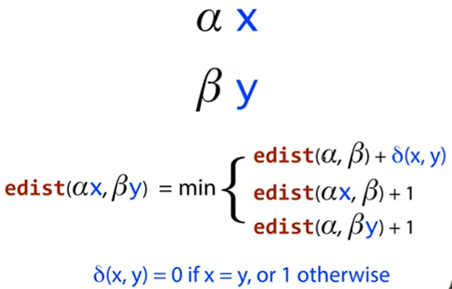

In [ ]:
import numpy as np
def global_backtrack(s1,s2,score):
  matrix = np.zeros((len(s1)+1,len(s2)+1)).tolist()
  score_matrix = list(map(int,score.split(' ')))
  backtrack = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  for i in range(1,len(s1)+1):  matrix[i][0] = matrix[i-1][0]-5 
  for j in range(1,len(s2)+1):  matrix[0][j] = matrix[0][j-1]-5  
  for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
      match= 0,0   
      if s1[i-1] == s2[j-1]:
        match =score_matrix[0] 
      elif s1[i-1] != s2[j-1]:  match = -score_matrix[1] 
      matrix[i][j] = max(matrix[i-1][j]-score_matrix[2],matrix[i][j-1]-score_matrix[2],matrix[i-1][j-1]+match)
      if matrix[i][j] == matrix[i-1][j-1]+match and s1[i-1] == s2[j-1]:  backtrack[i][j] = '↘r'
      elif matrix[i][j] == matrix[i-1][j-1]+match and s1[i-1] != s2[j-1]:  backtrack[i][j] = '↘p' 
      elif matrix[i][j] == matrix[i-1][j]-score_matrix[2]:  backtrack[i][j] = '↓'
      elif matrix[i][j] == matrix[i][j-1]-score_matrix[2]:  backtrack[i][j] = '→'
  print('score of edit distance:',-matrix[i][j]) 
  return backtrack      

s1 = 'TGCATACT'
s2 = 'ATCCGAT'
score = '0 1 1'
global_backtrack(s1,s2,score)

score of edit distance: 5.0


[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, '↘p', '→', '→', '→', '→', '→', '→'],
 [0, '↓', '↘p', '↘p', '↘p', '↘r', '→', '→'],
 [0, '↓', '↘p', '↘r', '↘r', '→', '↘p', '↘p'],
 [0, '↓', '↘p', '↓', '↘p', '↘p', '↘r', '→'],
 [0, '↓', '↘r', '↓', '↘p', '↘p', '↘p', '↘r'],
 [0, '↓', '↓', '↘p', '↘p', '↘p', '↘r', '↓'],
 [0, '↓', '↓', '↘r', '↘r', '↘p', '↓', '↘p'],
 [0, '↓', '↘r', '↓', '↘p', '↘p', '↓', '↘r']]

In [ ]:
s1 = 'GGACATATACTGACTTGCCTCGCAGTTAGTCATCGTTACCGTTCAGGGTAGCCAACGACCTTAGCACCCGAGGTGCCACACTGGGACGGACCCATTCTGACTATAAAATAGCCTCCGCTAGCGAACAGATAGCTTCAGACAAGATATAGGGCAAACTTTACACAGCCTTAAGCGTCCAGTAGAGGCGGGTACGGGAACCTTGGGAGCTTAGGGCCAACACCACCATCTTGCCTATAGTATGTCACGTAAGCTGTCGAAGGTGGAAAGTCCAGGGCACCGTCCATAAACCAAAACCCCGTTCCTCCATAAGACCAGCCCTATCGAGCTCCACCGCATGAAGATATCTGGTACGGAACGCGGAAAGTCTCCCAGGAACCAGATCAGAGAACCAGACAAAAGCGCGCTAGGTCTTCAGCGCGAGTGATTCTTTGGAACGCAGCATCTTGACGTCGCACCGACCATTAGAAACGTTCAGTATCGTTATGCCTTCCGGTTCATGATAACCTAGCACCCTAGAGGTACGTTTGCTTATATCACGGCGTAACCAGTGTATGGACTTTGAAGCTGCACCTCGGGCACTTGGTATGACCCCCCGCAGTGACGTAGCAATCTTTATGCCACCCCTGATGCCGATCAGTTATGATGAGCGTGATCCAGGAACAGGGGAGAGCTGCGTATCAACATTGAGTTGTCCACGGCCTCCAGAATTTCTCTATCTGTTCTATTGAAATTAGATAGCCCTGAAGCCCGGTCCTTAGAAAAGACCTACCAAGATCCATTGGAGGTAAGGACACTAACCTCCGGGTATGATCTTTGCTCGATATTACAGCGAGCGAGAGACCTATTGTTGCAGTTATATGGACAGGAGGTCACCAGTGATCAGAATAACTTCAAAGCGCG'
s2 = 'GGACTTATACTGACTTGCCTCGATCGTTGCCGTGACGTATATCGCTAACGACCTTAGTTACACGCAGGTGCCACGGCTTGCCCCATGCTCCACCCTGAGGTATAGCCTCCGCTAGCGATGCGAATCAGACAAGATTATATAGGGCAAACTTTACACAGCCTTACGCGTATCGGGAGTCGGGACTTGGTTAGGGACCTTATCTTTCCTATAGAGTGTCACGTAAGCAGACGATCCTGCGGGGCACCGATAAACCAAAACCCCGTTCCTCTAAGACCAGACCTAACGACCGAGTGTCGTCCGTATCTGGAGATGGGGCTTACCAACGCTTCCGTACGGATGGAAACCACAGGAACCAGATTTCCAGACCAGCGCTTAAAGCGCGCTAGCATCAGCGCGAGTGATTGCAGCGTCAGGGACAGCATCGACCATTAGCGTCGAGCATTCCGGTTCATGAACGGGGAACCACACTGAAGTCTAGAGGTCGGCGTAACCACGAACGAGTGTATAGCTGATAACGACCTTGCCACTTGTGACCCGCCGCAGTAAGGTAGCTGTATGTCTGCACCCCTGATGCCGAGCGGTCATGCTTGATCCATTAACTGGGGAGCGCTGCGTATCAACATTGATGTCCACGGCTTCCAGAGTTTCTCTTAGCTGTTCTATTCAGAAATTAGATAGCCCTGACCCGGTCGTTGAAAAACCAACAGAAGATCCATTGGAGAGATAAACTCTCTCGATCTGACAGTTCCCAAGCGAGACAAGACCTATTGGTTCAGAGCGATATGGACAGGAGGGACAATGAACATTTGATCAGAATAACATCAAAGCGCG'
score = '0 1 1'
global_backtrack(s1,s2,score)


('score of edit distance:', 291.0)

In [ ]:
s1 = 'CGTAGGCTTAAGGTTA'
s2 = 'ATAGATA'
align1 = ''
aling2 = ''
score = '0 1 1'
backtrack = global_backtrack(s1,s2,score)
backtrack
outputLCS_global(backtrack,s1,s2,align1,align2,len(s1),len(s2))

score of edit distance: 10.0


('CGTAGGCTTAAGGTTA', 'A-TA-G----A---TA')

##### Task 4

In [ ]:
score_pep =   '''0  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y
A  4  0 -2 -1 -2  0 -2 -1 -1 -1 -1 -2 -1 -1 -1  1  0  0 -3 -2
C  0  9 -3 -4 -2 -3 -3 -1 -3 -1 -1 -3 -3 -3 -3 -1 -1 -1 -2 -2
D -2 -3  6  2 -3 -1 -1 -3 -1 -4 -3  1 -1  0 -2  0 -1 -3 -4 -3
E -1 -4  2  5 -3 -2  0 -3  1 -3 -2  0 -1  2  0  0 -1 -2 -3 -2
F -2 -2 -3 -3  6 -3 -1  0 -3  0  0 -3 -4 -3 -3 -2 -2 -1  1  3
G  0 -3 -1 -2 -3  6 -2 -4 -2 -4 -3  0 -2 -2 -2  0 -2 -3 -2 -3
H -2 -3 -1  0 -1 -2  8 -3 -1 -3 -2  1 -2  0  0 -1 -2 -3 -2  2
I -1 -1 -3 -3  0 -4 -3  4 -3  2  1 -3 -3 -3 -3 -2 -1  3 -3 -1
K -1 -3 -1  1 -3 -2 -1 -3  5 -2 -1  0 -1  1  2  0 -1 -2 -3 -2
L -1 -1 -4 -3  0 -4 -3  2 -2  4  2 -3 -3 -2 -2 -2 -1  1 -2 -1
M -1 -1 -3 -2  0 -3 -2  1 -1  2  5 -2 -2  0 -1 -1 -1  1 -1 -1
N -2 -3  1  0 -3  0  1 -3  0 -3 -2  6 -2  0  0  1  0 -3 -4 -2
P -1 -3 -1 -1 -4 -2 -2 -3 -1 -3 -2 -2  7 -1 -2 -1 -1 -2 -4 -3
Q -1 -3  0  2 -3 -2  0 -3  1 -2  0  0 -1  5  1  0 -1 -2 -2 -1
R -1 -3 -2  0 -3 -2  0 -3  2 -2 -1  0 -2  1  5 -1 -1 -3 -3 -2
S  1 -1  0  0 -2  0 -1 -2  0 -2 -1  1 -1  0 -1  4  1 -2 -3 -2
T  0 -1 -1 -1 -2 -2 -2 -1 -1 -1 -1  0 -1 -1 -1  1  5  0 -2 -2
V  0 -1 -3 -2 -1 -3 -3  3 -2  1  1 -3 -2 -2 -3 -2  0  4 -3 -1
W -3 -2 -4 -3  1 -2 -2 -3 -3 -2 -1 -4 -4 -2 -3 -3 -2 -3 11  2
Y -2 -2 -3 -2  3 -3  2 -1 -2 -1 -1 -2 -3 -1 -2 -2 -2 -1  2  7'''

In [ ]:
# amino position in score_peptide_matrix
score = convert_to_matrix(score_pep)
pos_pep = {}
for i in range(1,len(score[0])):
  pos_pep[score[0][i]] = i
print(pos_pep)  

{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}


In [ ]:
align1 = ''
align2 = ''
s1 = 'DISCREPANTLY'
s2 = 'PATENT'
#score = convert_to_matrix(score_pep)
backtrack = local_backtrack(s1,s2,score,pos_pep)
backtrack
#outputLCS_global(backtrack,s1,s2,align1,align2,len(s1),len(s2))

score: 1


[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, '↘p', '↘p', '↘p', '↘p', '↘p'],
 [0, 0, '↘p', '↘p', 0, 0, '↘p'],
 [0, 0, 0, 0, '↘p', '↘p', 0],
 [0, 0, 0, 0, '↘r', '↘p', 0],
 [0, 0, 0, 0, '↓', '↘p', 0],
 [0, 0, '↘r', '↘p', 0, 0, '↘p'],
 [0, 0, 0, '↘p', '↘p', '↘r', '→'],
 [0, 0, '↘p', '↘r', '↘p', '↓', '↘r'],
 [0, 0, 0, '↓', '↘p', '↘p', '↓'],
 [0, 0, 0, 0, 0, '↘p', '↓']]

#### Tasks
1. Affine gap penalty
2. Solve the Middle Edge in Linear Space Problem

##### Task 1

In [ ]:
def match(s1,s2,i,j,score): #i:pos of s1; j: pos of s2
  s = list(map(int,score.split(' ')))
  if s1[i-1] == s2[j-1]:  
    return s[0]
  else:
    return -s[1]

In [ ]:
import numpy as np
def dis_matrix(score, s1, s2): 
  s = list(map(int,score.split(' ')))
  lower, upper, mid = np.zeros((len(s1)+1,len(s2)+1)).tolist(), np.zeros((len(s1)+1,len(s2)+1)).tolist(), np.zeros((len(s1)+1,len(s2)+1)).tolist()
  for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
      # create lower: extend the gap: del
      lower[i][j] = max((lower[i-1][j]-s[3]),(mid[i-1][j]-s[2]-s[3]),(upper[i-1][j]-s[2]-s[3]))
      # create upper: extend the gap: ins
      upper[i][j] = max((upper[i][j-1]-s[3]),(mid[i][j-1]-s[2]-s[3]),(lower[i][j-1]-s[2]-s[3]))
      # create middle: initial the gap  
      mid[i][j] = max(lower[i][j],upper[i][j],mid[i-1][j-1]+match(s1,s2,i,j,score)) 
  return lower,upper,mid     
score = '1 3 2 1' # match, mis, gap open, gap extension
s1 = 'GA'  
s2 = 'GTTA'
dis_matrix(score,s1,s2)

([[0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, -1.0, -1.0, -1.0, -1.0],
  [0.0, -2.0, -2.0, -2.0, -2.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, -1.0, -2.0, -3.0, -4.0],
  [0.0, -1.0, -2.0, -3.0, -4.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, -1.0, -1.0, -1.0],
  [0.0, -1.0, -2.0, -2.0, 0.0]])

In [ ]:
def backtrack(lower,upper,mid,s1,s2,i,j,align1,align2,score,li_score): # require len(s1) < len(s2)
  if i == 0 and j == 0: return li_score, align1, align2
  if mid[i][j] == mid[i-1][j-1] + match(s1,s2,i,j,score):
    align1 = s1[i-1] + align1
    align2 = s2[j-1] + align2
    li_score += mid[i][j]
    return backtrack(lower,upper,mid,s1,s2,i-1,j-1,align1,align2,score,li_score)
  elif mid[i][j] == lower[i][j]:
    align1 = '-' + align1
    align2 = s2[j-1] + align2
    li_score += mid[i][j]
    return backtrack(lower,upper,mid,s1,s2,i,j-1,align1,align2,score,li_score)
  elif mid[i][j] == upper[i][j]:
    align1 = s1[i-1] + align1
    align2 = '-' + align2
    li_score += mid[i][j]
    return backtrack(lower,upper,mid,s1,s2,i-1,j,align1,align2,score,li_score)     

In [ ]:
score = '1 3 2 1' # match, mis, gap open, gap extension
s1 = 'GA'  
s2 = 'GTTA'
lower, upper, mid = dis_matrix(score,s1,s2)
i,j,li_score = len(s1),len(s2),0 
align1, align2 = '',''
backtrack(lower,upper,mid,s1,s2,i,j,align1,align2,score,li_score)  

In [ ]:
score = '1 5 3 1' # match, mis, gap open, gap extension
s2 = 'GATCCAG'  
s1 = 'GACAG'
lower, upper, mid = dis_matrix(score,s1,s2)
i,j,li_score = len(s1),len(s2),0 # len(s1) should < len(s2)
align1, align2 = '',''
backtrack(lower,upper,mid,s1,s2,i,j,align1,align2,score,li_score)  
lower, upper, mid

([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
  [0.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0],
  [0.0, -3.0, -2.0, -3.0, -3.0, -3.0, -3.0, -3.0],
  [0.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -4.0],
  [0.0, -5.0, -4.0, -5.0, -5.0, -5.0, -4.0, -5.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -5.0, -5.0],
  [0.0, -1.0, -2.0, -2.0, -3.0, -4.0, -5.0, -4.0],
  [0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -5.0, -6.0],
  [0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -4.0],
  [0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0],
  [0.0, -1.0, 2.0, -2.0, -2.0, -2.0, 0.0, -2.0],
  [0.0, -1.0, -2.0, -3.0, -1.0, -1.0, -3.0, -3.0],
  [0.0, -1.0, 0.0, -3.0, -4.0, -4.0, 0.0, -4.0],
  [0.0, 1.0, -2.0, -3.0, -4.0, -5.0, -4.0, 1.0]])

In [ ]:
score = '10 5 3 1' # match, mis, gap open, gap extension
s1 = 'GGCGCAGAACTGAATCGAGACACAACTATGCGCCTGGCCGGAGGAATCAATCGGTGGCAGTTGACTCCCCAACGTTCTCTGGCACCTTGC'  
s2 = 'GGCGCAGAACTGACAGTTATGCGCCTGGCACAGAGGGGGGAATCAGTCCGTCGCAGGTATGGCCTCGTCCCAAAAAGTTTGGGATCTGGCACCTTGC'
lower, upper, mid = dis_matrix(score,s1,s2)
i,j,li_score = len(s1),len(s2),0 
align1, align2 = '',''
backtrack(lower,upper,mid,s1,s2,i,j,align1,align2,score,li_score) 

In [ ]:
def backtrack(lower,upper,mid,s1,s2,i,j,align1,align2,score,li_score): # require len(s1) < len(s2)
  if i == 0 and j == 0: return li_score, align1, align2
  if mid[i][j] == mid[i-1][j-1] + match(s1,s2,i,j,score):
    align1 += s1[i-1]
    align2 += s2[j-1]
    li_score += mid[i][j]
    return backtrack(lower,upper,mid,s1,s2,i-1,j-1,align1,align2,score,li_score)
  elif mid[i][j] == lower[i][j]:
    align1 += s1[i-1]
    align2 += '-'
    li_score += mid[i][j]
    return backtrack(lower,upper,mid,s1,s2,i,j-1,align1,align2,score,li_score)
  elif mid[i][j] == upper[i][j]:
    align1 += '-'
    align2 += s2[j-1]
    li_score += mid[i][j]
    return backtrack(lower,upper,mid,s1,s2,i-1,j,align1,align2,score,li_score)  

In [ ]:
score = '10 2 15 7' # match, mis, gap open, gap extension
s1 = 'CAT'  
s2 = 'CARTS'
lower, upper, mid = dis_matrix(score,s1,s2)
i,j,li_score = len(s1),len(s2),0 
align1, align2 = '',''
backtrack(lower,upper,mid,s1,s2,i,j,align1,align2,score,li_score) 

(-6.0, '-ACTTT', 'SST---')

In [ ]:
lower, upper, mid

([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, -7.0, -7.0, -7.0, -7.0, -7.0],
  [0.0, -5.0, -14.0, -14.0, -14.0, -14.0],
  [0.0, -12.0, 5.0, -10.0, -17.0, -19.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, -7.0, -5.0, -12.0, -17.0, -17.0],
  [0.0, -7.0, -14.0, 5.0, -2.0, -9.0],
  [0.0, -7.0, -14.0, -10.0, 3.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 10.0, -2.0, -2.0, -2.0, -2.0],
  [0.0, -2.0, 20.0, 5.0, -2.0, -4.0],
  [0.0, -2.0, 5.0, 18.0, 15.0, 0.0]])

##### Task 2
1. Calculate middle node by length of path

In [ ]:
import numpy as np
def left(s1,s2,j,matrix):
  if j == int(len(s2)/2)+1: return matrix
  for i in range(1,len(s1)+1):
    match = 0
    if s1[i-1] == s2[j-1]:  match = 1
    matrix[i][j] = max((matrix[i-1][j-1] + match),(matrix[i-1][j]),(matrix[i][j-1]))  
  return left(s1,s2,j+1,matrix)

def right(s1,s2,j,matrix):
  if j == int(len(s2)/2): return matrix 
  for i in range(1,len(s1)+1):
    match = 0
    if s1[len(s1)-i] == s2[j-1]:  match = 1
    matrix[len(s1)-i][j-1] = max((matrix[len(s1)-i+1][j] + match),(matrix[len(s1)-i][j]),(matrix[len(s1)-i+1][j-1]))
  return right(s1,s2,j-1,matrix)  

In [ ]:
s1 = 'ATTCAA'
s2 = 'ACGGAA'
matrix_right = np.zeros((len(s1)+1,len(s2)+1),dtype = 'object').tolist()
matrix_left = np.zeros((len(s1)+1,len(s2)+1),dtype = 'object').tolist()
r = right(s1,s2,len(s2),matrix_right)
l = left(s1,s2,1,matrix_left)
sum = np.array(l) + np.array(r)
sum = sum.tolist()
sum

[[0, 0, 0, 2, 2, 1, 0],
 [0, 1, 1, 3, 2, 1, 0],
 [0, 1, 1, 3, 2, 1, 0],
 [0, 1, 1, 3, 2, 1, 0],
 [0, 1, 2, 4, 2, 1, 0],
 [0, 1, 2, 3, 1, 1, 0],
 [0, 1, 2, 2, 0, 0, 0]]

In [ ]:
def find_node(sum,s1,s2,i,r,c,mid_node):
  if i == len(s1)+1:  return r,c
  mid = int(len(s2)/2)
  if sum[i][mid] > mid_node:
    mid_node = sum[i][mid] 
    r = i
    c = mid
  return find_node(sum,s1,s2,i+1,r,c,mid_node)  
def split_string(s1,s2,r,c):
  s1_left, s2_left = s1[:r], s2[:c]
  s1_right, s2_right = s1[-(len(s1)-r):], s2[-(len(s2)-c):]
  return s1_left, s1_right, s2_left, s2_right  

def reverse(string,new,i):
  if i == len(string):  return new
  new = string[i] + new
  return reverse(string,new,i+1)

In [ ]:
r,c = find_node(sum,s1,s2,0,0,0,0)
s1_left, s1_right, s2_left, s2_right = split_string(s1,s2,r,c)
s1_left, s1_right, s2_left, s2_right

('ATTC', 'AA', 'ACG', 'GAA')

In [ ]:
re_s1_r = reverse(s1_right,'',0)
re_s2_r = reverse(s2_right,'',0)
re_s1_r, re_s2_r

('AA', 'AAG')

In [ ]:
def backtrack(s1,s2):
  matrix = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  backtrack = np.zeros((len(s1)+1,len(s2)+1),dtype='object').tolist()
  for r in range(1,len(s1)+1):
    for c in range(1,len(s2)+1):
      match = 0
      if s1[r-1] == s2[c-1]:  match = 1
      matrix[r][c] = max((matrix[r-1][c-1]+match),(matrix[r-1][c]),(matrix[r][c-1]))
      if matrix[r][c] == matrix[r-1][c-1]+match:  backtrack[r][c] = '↘'
      elif matrix[r][c] == matrix[r-1][c]:  backtrack[r][c] = '↓'
      elif matrix[r][c] == matrix[r][c-1]:  backtrack[r][c] = '→'
  return backtrack    

def output_LCS_left(backtrack_l,s1,s2,i,j,align1,align2):
  if i == 0 and j == 0: 
    return align1, align2
  if backtrack_l[i][j] == '↘':
    align1 = s1[i-1] + align1
    align2 = s2[j-1] + align2
    return output_LCS_left(backtrack_l,s1,s2,i-1,j-1,align1,align2)
  elif backtrack_l[i][j] == '→':
    align1 = '-' + align1
    align2 = s2[j-1] + align2
    return output_LCS_left(backtrack_l,s1,s2,i,j-1,align1,align2) 
  elif backtrack_l[i][j] == '↓':
    align1 = s1[i-1] + align1
    align2 = '-' + align2
    return output_LCS_left(backtrack_l,s1,s2,i-1,j,align1,align2)    

def output_LCS_right(backtrack_r,s1,s2,i,j,align1,align2):
  if i == 0 and j == 0: 
    return align1, align2
  if backtrack_r[i][j] == '↘':
    align1 += s1[i-1]
    align2 += s2[j-1]
    return output_LCS_right(backtrack_r,s1,s2,i-1,j-1,align1,align2)
  elif backtrack_r[i][j] == '→':
    align1 += '-' 
    align2 += s2[j-1]
    return output_LCS_right(backtrack_r,s1,s2,i,j-1,align1,align2) 
  elif backtrack_r[i][j] == '↓':
    align1 += s1[i-1]
    align2 += '-'
    return output_LCS_right(backtrack_r,s1,s2,i-1,j,align1,align2) 

In [ ]:
align1_l, align2_l = '',''
backtrack_l = backtrack(s1_left,s2_left)
align1_l, align2_l = output_LCS_left(backtrack_l,s1_left,s2_left,len(s1_left),len(s2_left),align1_l,align2_l)
align1_l, align2_l

('ATTC-', 'A--CG')

In [ ]:
align1_r, align2_r = '',''
backtrack_r = backtrack(re_s1_r,re_s2_r)
align1_r, align2_r = output_LCS_right(backtrack_r,re_s1_r,re_s2_r,len(re_s1_r),len(re_s2_r),align1_r,align2_r)
align1_r, align2_r

('-AA', 'GAA')

In [ ]:
all_align1 = align1_l + align1_r
all_align2 = align2_l + align2_r
all_align1, all_align2

('ATTC--AA', 'A--CGGAA')

In [ ]:
s1 = 'ACTTAATT'
s2 = 'GAGCAATT'
matrix_right = np.zeros((len(s1)+1,len(s2)+1),dtype = 'object').tolist()
matrix_left = np.zeros((len(s1)+1,len(s2)+1),dtype = 'object').tolist()
r = right(s1,s2,len(s2),matrix_right)
l = left(s1,s2,1,matrix_left)
sum = np.array(l) + np.array(r)
sum.tolist()

[[0, 0, 0, 0, 4, 3, 2, 1, 0],
 [0, 0, 1, 1, 5, 3, 2, 1, 0],
 [0, 0, 1, 1, 6, 3, 2, 1, 0],
 [0, 0, 1, 1, 6, 3, 2, 1, 0],
 [0, 0, 1, 1, 6, 3, 2, 1, 0],
 [0, 0, 1, 1, 5, 3, 2, 1, 0],
 [0, 0, 1, 1, 4, 2, 2, 1, 0],
 [0, 0, 1, 1, 3, 1, 1, 1, 0],
 [0, 0, 1, 1, 2, 0, 0, 0, 0]]

##### Task 3: multiple alignments

In [ ]:
import numpy as np
def mul_align(s1,s2,s3):
  matrix, backtrack = np.zeros((len(s1)+1,len(s2)+1,len(s3)+1),dtype='object').tolist(), np.zeros((len(s1)+1,len(s2)+1,len(s3)+1),dtype='object').tolist()
  for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
      for o in range(1,len(s3)+1):
        match = 0
        if s1[i-1] == s2[j-1] == s3[o-1]: match = 1
        matrix[i][j][o] = max((matrix[i-1][j-1][o-1]+match),(matrix[i-1][j][o]),(matrix[i][j-1][o]),(matrix[i][j][o-1]),(matrix[i-1][j-1][o]),(matrix[i-1][j][o-1]),(matrix[i][j-1][o-1]))
        if matrix[i][j][o] == matrix[i-1][j-1][o-1]+match:  backtrack[i][j][o] = '↘'
        elif matrix[i][j][o] == matrix[i-1][j][o]:  backtrack[i][j][o] = '↓1'
        elif matrix[i][j][o] == matrix[i][j-1][o]:  backtrack[i][j][o] = '↓2'
        elif matrix[i][j][o] == matrix[i][j][o-1]:  backtrack[i][j][o] = '↓3'
        elif matrix[i][j][o] == matrix[i-1][j-1][o]:  backtrack[i][j][o] = '↓1,2'
        elif matrix[i][j][o] == matrix[i-1][j][o-1]:  backtrack[i][j][o] = '↓1,3'
        elif matrix[i][j][o] == matrix[i][j-1][o-1]:  backtrack[i][j][o] = '↓2,3'
  return matrix[i][j][o],backtrack        

In [ ]:
s1 = 'ATATCCG'
s2 = 'TCCGA'
s3 = 'ATGTACTG'
mul_align(s1,s2,s3)


(3,
 [[[0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0]],
  [[0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, '↘', '↘', '↘', '↘', '↘', '↘', '↘', '↘'],
   [0, '↘', '↘', '↘', '↘', '↘', '↘', '↘', '↘'],
   [0, '↘', '↘', '↘', '↘', '↘', '↘', '↘', '↘'],
   [0, '↘', '↘', '↘', '↘', '↘', '↘', '↘', '↘'],
   [0, '↘', '↓3', '↓3', '↓3', '↘', '↓3', '↓3', '↓3']],
  [[0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, '↘', '↘', '↓3', '↘', '↓3', '↓3', '↘', '↓3'],
   [0, '↘', '↓2', '↓2', '↓2', '↓2', '↓2', '↓2', '↓2'],
   [0, '↘', '↓2', '↓2', '↓2', '↓2', '↓2', '↓2', '↓2'],
   [0, '↘', '↓2', '↓2', '↓2', '↓2', '↓2', '↓2', '↓2'],
   [0, '↓1', '↓1', '↓1', '↓1', '↓1', '↓1', '↓1', '↓1']],
  [[0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, '↘', '↓1', '↓1', '↓1', '↓1', '↓1', '↓1', '↓1'],
   [0, '↘', '↓1', '↘', '↘', '↘', '↘', '↘', '↘'],
   [0, '↘', '↓1', '↘', '↘', '↘', '↘', '↘', '↘'],
   [0, '↘', '↓1', '↘', '↘', '↘', 

In [ ]:
def outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i,j,o):
  if backtrack[i][j][o] == 0: return align1,align2,align3
  if backtrack[i][j][o] == '↘':
    align1 = s1[i-1] + align1
    align2 = s2[j-1] + align2
    align3 = s3[o-1] + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i-1,j-1,o-1)
  elif backtrack[i][j][o] == '↓1': 
    align1 = s1[i-1] + align1
    align2 = '-' + align2
    align3 = '-' + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i-1,j,o)
  elif backtrack[i][j][o] == '↓2': 
    align1 = '-' + align1
    align2 = s2[j-1] + align2
    align3 = '-' + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i,j-1,o)
  elif backtrack[i][j][o] == '↓3': 
    align1 = '-' + align1
    align2 = '-' + align2
    align3 = s3[o-1] + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i,j,o-1)    
  elif backtrack[i][j][o] == '↓1,2': 
    align1 = s1[i-1] + align1
    align2 = s2[j-1] + align2
    align3 = '-' + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i-1,j-1,o)
  elif backtrack[i][j][o] == '↓1,3': 
    align1 = s1[i-1] + align1
    align2 = '-' + align2
    align3 = s3[o-1] + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i-1,j,o-1)
  elif backtrack[i][j][o] == '↓2,3': 
    align1 = '-' + align1
    align2 = s2[j-1] + align2
    align3 = s3[o-1] + align3
    return outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,i,j-1,o-1)    

In [ ]:
s1 = 'ATATCCG'
s2 = 'TCCGA'
s3 = 'ATGTACTG'
align1, align2, align3 = '','',''
matrix, backtrack = mul_align(s1,s2,s3)
outputLCS_global_mul(backtrack,s1,s2,s3,align1,align2,align3,len(s1),len(s2),len(s3))

('T-ATCCG-', 'T---CCGA', 'TA--CTG-')

#### Tasks
1. Greedy sorting for reversal correction
2. Count number of breakpoints

In [ ]:
def greedy_sort(blocks):
  a = blocks.split(' ')
  start = 1
  while start <= len(a):
    b = []
    for i in range(start-1,len(a)):
      if str(start) in list(a[i]):
        for j in range(1,i+2-start+1):
          b.append(a[start-1:i+1][-j])
    for z,o in zip(range(start-1,start-1+len(b)),range(0,len(b))):
      if list(b[o])[0] == '+':  pre = '-'
      elif list(b[o])[0] == '-':  pre = '+'
      a[z] = pre + list(b[o])[1] 
    print(a)    
    if list(a[start-1])[0] == '-':  
      a[start-1] = '+' + list(a[start-1])[1]     
    start +=1 

blocks = '-3 +4 +1 +5 -2'
greedy_sort(blocks)

['-1', '-4', '+3', '+5', '-2']
['+1', '+2', '-5', '-3', '+4']
['+1', '+2', '+3', '+5', '+4']
['+1', '+2', '+3', '-4', '-5']
['+1', '+2', '+3', '+4', '+5']


In [ ]:
blocks = '+5 +91 +39 -17 +105 -67 +120 -54 +11 +98 +74 +114 -37 +29 +57 +32 -89 +64 +128 +124 -111 -19 -104 -106 -80 +9 -83 -123 -140 +135 -34 +35 +2 -117 +69 -21 +25 +22 +75 -13 +15 +30 -113 +146 -127 +139 -93 -102 +101 +95 -142 +147 +43 -87 -48 -20 -55 +44 +119 +81 -18 -107 -68 +122 +134 -3 -63 +70 +121 +79 +50 +129 +1 +23 +86 +8 -72 -144 -7 -60 +148 -76 -51 -28 -49 +77 +6 +85 -16 +145 -24 -56 -53 +143 -40 -31 -71 -73 -110 -84 +99 -112 -66 +88 -100 -137 +136 -65 +38 +41 -78 -108 +4 -45 -58 -133 -90 -96 +118 +62 +141 +126 -36 +149 +132 +42 +33 -138 -130 +47 -14 +26 +92 -59 -27 +10 +61 +82 -125 +103 -109 +46 +97 -131 +115 +116 +52 -94 +12'
greedy_sort(blocks)

In [ ]:
-1 -4 +3 +5 -2
+1 -4 +3 +5 -2
+1 +2 -5 -3 +4
+1 +2 +3 +5 +4
+1 +2 +3 -4 -5
+1 +2 +3 +4 -5
+1 +2 +3 +4 +5

In [ ]:
def num_breakpoint(string):
  blocks = [0] + list(map(int,string.split(' '))) + [len(list(map(int,string.split(' '))))+1]
  adj= 0
  for i in range(0,len(blocks)-1):
    if blocks[i+1] - blocks[i] == 1:
      adj +=1
  breakpoint = (len(blocks)-1) - adj
  return breakpoint    

In [ ]:
string = '+3 +4 +5 -12 -8 -7 -6 +1 +2 +10 +9 -11 +13 +14'
num_breakpoint(string)

8

In [ ]:
file = "/content/dataset_287_6.txt"
with open(file) as f:
  text = f.read() 
num_breakpoint(text)  

171

#### Tasks:
1. 2-break distance problem
2. Genome to breakpoint graph
3. Sorting 2-break graph

In [ ]:
def mulchrom_to_single(chroms):
  c = []
  for i in chroms.split('('):
    if i!= '':
      for j in i.split(')'):
        if j != '':
          c.append(j)
  c1 = []        
  for o in c:
    for i in o.split(' '):
      c1.append(i)
  return c, c1            

In [ ]:
def chrom_to_cycle(chrom):
  linear = list(map(int,chrom))
  cycle = []
  for i in range(0,len(linear)):
    cycle.append(int(''.join(list(chrom[i])[1:]))*2-1)
    cycle.append(int(''.join(list(chrom[i])[1:]))*2)
  new_cycle = [None] * len(cycle)  
  for i in range(0,len(linear)):
    if linear[i] > 0:
      new_cycle[i*2] = cycle[i*2]
      new_cycle[i*2+1] = cycle[i*2+1]
    elif linear[i] < 0:
      new_cycle[i*2] = cycle[i*2+1]
      new_cycle[i*2+1] = cycle[i*2]    
  return ' '.join(list(map(str,new_cycle)))  

In [ ]:
chroms = '(+1 -2 -3 +4)'
mul_chrom, one_chrom = mulchrom_to_single(chroms)
chrom_to_cycle(one_chrom) #output: (1 2 4 3 6 5 7 8)

'1 2 4 3 6 5 7 8'

In [ ]:
chroms = '(-1 -2 -3 +4 +5 +6 -7 +8 -9 +10 -11 +12 +13 -14 +15 +16 -17 +18 +19 -20 +21 +22 +23 -24 +25 -26 +27 +28 +29 +30 -31 -32 -33 -34 -35 -36 -37 -38 -39 +40 +41 -42 +43 -44 -45 +46 +47 -48 -49 +50 -51 -52 +53 -54 -55 +56 -57 -58 +59 +60 +61 -62 -63 +64 -65 -66 +67)'
chrom = mulchrom_to_single(chroms)
chrom_to_cycle(chrom)

'2 1 4 3 6 5 7 8 9 10 11 12 14 13 15 16 18 17 19 20 22 21 23 24 25 26 28 27 29 30 31 32 34 33 35 36 37 38 40 39 41 42 43 44 45 46 48 47 49 50 52 51 53 54 55 56 57 58 59 60 62 61 64 63 66 65 68 67 70 69 72 71 74 73 76 75 78 77 79 80 81 82 84 83 85 86 88 87 90 89 91 92 93 94 96 95 98 97 99 100 102 101 104 103 105 106 108 107 110 109 111 112 114 113 116 115 117 118 119 120 121 122 124 123 126 125 127 128 130 129 132 131 133 134'

In [ ]:
def cycle_to_chrom(cycle):
  cycle = list(map(int,cycle))
  chrom = []
  for i in range(round(min(cycle)/2 + 0.1),round(max(cycle)/2)+1):
    chrom.append(i)
  new_chrom = [None] * len(chrom)
  for i in range(0,len(new_chrom)):
    if cycle[i*2] < cycle[i*2+1]:
      new_chrom[i] = '+' + str(chrom[i])
    elif cycle[i*2] > cycle[i*2+1]:
      new_chrom[i] = '-' + str(chrom[i])
  return ' '.join(new_chrom)       

In [ ]:
cycle = '(1 2 4 3 6 5 7 8)'
mul_chrom, cycle = mulchrom_to_single(cycle)
cycle_to_chrom(cycle)

'+1 -2 -3 +4'

In [ ]:
cycle = '(1 2 3 4 5 6 7 8 10 9 11 12 14 13 16 15 17 18 20 19 21 22 23 24 26 25 27 28 30 29 31 32 34 33 35 36 37 38 39 40 42 41 43 44 45 46 48 47 50 49 51 52 54 53 55 56 57 58 60 59 61 62 64 63 65 66 67 68 70 69 71 72 74 73 75 76 78 77 80 79 82 81 83 84 86 85 87 88 89 90 91 92 93 94 96 95 97 98 100 99 102 101 104 103 106 105 107 108 109 110 112 111 113 114 115 116 117 118 120 119 121 122 123 124 125 126 127 128 130 129 132 131 134 133 135 136 137 138)'
cycle = mulchrom_to_single(cycle)
cycle 
cycle_to_chrom(cycle)

'+1 +2 +3 +4 -5 +6 -7 -8 +9 -10 +11 +12 -13 +14 -15 +16 -17 +18 +19 +20 -21 +22 +23 -24 -25 +26 -27 +28 +29 -30 +31 -32 +33 +34 -35 +36 -37 +38 -39 -40 -41 +42 -43 +44 +45 +46 +47 -48 +49 -50 -51 -52 -53 +54 +55 -56 +57 +58 +59 -60 +61 +62 +63 +64 -65 -66 -67 +68 +69'

In [ ]:
def split_chroms(mul_chroms):
  start = []
  end = []
  e = 0
  for i in range(0,len(mul_chroms)):
    start.append(i + e)
    end.append((i+e+len(mul_chroms[i].split(' '))*2))
    e = len(mul_chroms[i].split(' '))*2-1
  return start, end

In [ ]:
def colored_edges(start,end,cycles):
  result = []
  j = 0
  while j != len(start):
    edges = []
    cycle = ' '.join(cycles.split(' ')[start[j]:end[j]])
    color_cycle = cycle.split(' ') + cycle.split(' ')[0:2]
    for i in range(1,int((len(color_cycle)-2)/2)+1):
      edges.append((int(color_cycle[i*2-1]),int(color_cycle[i*2])))
    result += edges   
    j +=1
    result = list(map(str,result))
  return ', '.join(result) 

In [ ]:
def graph_to_genome(graph):
  string = []
  cycles = []
  start = [1]
  end = []
  chroms = []
  j = 0
  for i in graph:
    string.append(i[0])
    string.append(i[1])
  string = [0] + string + [len(string)+1]
  for i in range(1,len(string)-1):
    if string[i-1]>string[i]<string[i+1] and string[i-1]-string[i] !=1 and string[i+1]-string[i]!=1:
      end.append(i)
      if i+1!= len(string)-1:
        start.append(i+1)   
  while j!=len(start):
    cycle = list(map(str,[string[start[j]:end[j]+1][-1]] + string[start[j]:end[j]]))
    cycles.append(cycle_to_chrom(cycle))
    j +=1   
  return '('+')('.join(cycles)+')'

In [ ]:
graph = [(2, 3), (4, 6), (5, 7), (8, 10), (9, 11), (12, 14), (13, 15), (16, 17), (18, 20), (19, 21), (22, 24), (23, 26), (25, 28), (27, 29), (30, 31), (32, 34), (33, 35), (36, 37), (38, 39), (40, 42), (41, 44), (43, 45), (46, 47), (48, 50), (49, 51), (52, 53), (54, 55), (56, 58), (57, 1), (59, 61), (62, 64), (63, 66), (65, 68), (67, 69), (70, 71), (72, 73), (74, 75), (76, 78), (77, 79), (80, 82), (81, 84), (83, 85), (86, 88), (87, 90), (89, 91), (92, 93), (94, 95), (96, 97), (98, 100), (99, 102), (101, 103), (104, 106), (105, 108), (107, 109), (110, 111), (112, 60), (114, 115), (116, 117), (118, 120), (119, 121), (122, 124), (123, 126), (125, 128), (127, 129), (130, 132), (131, 134), (133, 136), (135, 138), (137, 139), (140, 141), (142, 143), (144, 145), (146, 148), (147, 150), (149, 152), (151, 153), (154, 155), (156, 157), (158, 160), (159, 162), (161, 163), (164, 165), (166, 168), (167, 169), (170, 113), (171, 173), (174, 175), (176, 177), (178, 180), (179, 181), (182, 184), (183, 185), (186, 188), (187, 189), (190, 191), (192, 194), (193, 195), (196, 197), (198, 200), (199, 202), (201, 204), (203, 205), (206, 207), (208, 209), (210, 211), (212, 214), (213, 216), (215, 217), (218, 219), (220, 221), (222, 224), (223, 172), (225, 227), (228, 229), (230, 231), (232, 234), (233, 236), (235, 237), (238, 239), (240, 242), (241, 244), (243, 245), (246, 247), (248, 249), (250, 251), (252, 254), (253, 255), (256, 258), (257, 260), (259, 261), (262, 264), (263, 265), (266, 267), (268, 269), (270, 271), (272, 273), (274, 276), (275, 277), (278, 226), (280, 281), (282, 284), (283, 285), (286, 287), (288, 289), (290, 291), (292, 293), (294, 296), (295, 297), (298, 300), (299, 302), (301, 303), (304, 305), (306, 308), (307, 309), (310, 311), (312, 314), (313, 316), (315, 317), (318, 319), (320, 321), (322, 324), (323, 326), (325, 328), (327, 330), (329, 331), (332, 334), (333, 335), (336, 279), (338, 339), (340, 342), (341, 344), (343, 345), (346, 348), (347, 349), (350, 352), (351, 354), (353, 356), (355, 358), (357, 360), (359, 361), (362, 363), (364, 366), (365, 368), (367, 370), (369, 372), (371, 373), (374, 375), (376, 378), (377, 380), (379, 382), (381, 383), (384, 386), (385, 337), (387, 389), (390, 392), (391, 394), (393, 395), (396, 397), (398, 400), (399, 402), (401, 404), (403, 405), (406, 408), (407, 410), (409, 411), (412, 413), (414, 415), (416, 418), (417, 420), (419, 422), (421, 423), (424, 426), (425, 428), (427, 429), (430, 431), (432, 433), (434, 435), (436, 437), (438, 388), (439, 441), (442, 444), (443, 445), (446, 447), (448, 450), (449, 451), (452, 453), (454, 456), (455, 457), (458, 459), (460, 462), (461, 463), (464, 466), (465, 467), (468, 470), (469, 471), (472, 474), (473, 476), (475, 477), (478, 480), (479, 440)]
graph_to_genome(graph) 

'(+1 +2 -3 +4 -5 +6 -7 +8 +9 -10 +11 -12 -13 -14 +15 +16 -17 +18 +19 +20 -21 -22 +23 +24 -25 +26 +27 +28 -29)(-30 +31 -32 -33 -34 +35 +36 +37 +38 -39 +40 -41 -42 +43 -44 -45 +46 +47 +48 +49 -50 -51 +52 -53 -54 +55 +56)(+57 +58 +59 -60 +61 -62 -63 -64 +65 -66 -67 -68 -69 +70 +71 +72 +73 -74 -75 -76 +77 +78 +79 -80 -81 +82 +83 -84 +85)(-86 +87 +88 +89 -90 +91 -92 +93 -94 +95 +96 -97 +98 +99 -100 -101 -102 +103 +104 +105 +106 -107 -108 +109 +110 +111 -112)(-113 +114 +115 +116 -117 -118 +119 +120 -121 -122 +123 +124 +125 +126 -127 +128 -129 -130 +131 -132 +133 +134 +135 +136 +137 -138 +139)(+140 +141 -142 +143 +144 +145 +146 +147 -148 +149 -150 -151 +152 +153 -154 +155 +156 -157 -158 +159 +160 +161 -162 -163 -164 -165 +166 -167 +168)(+169 +170 -171 -172 +173 -174 +175 -176 -177 -178 -179 -180 +181 +182 -183 -184 -185 -186 +187 +188 -189 -190 -191 +192 -193)(-194 +195 -196 -197 +198 +199 -200 -201 -202 +203 -204 -205 +206 +207 +208 -209 -210 -211 +212 -213 -214 +215 +216 +217 +218 +219)(-22

In [ ]:
graph = [(2, 4), (3, 6), (5, 1), (7, 9), (10, 12), (11, 8)]
graph_to_genome(graph) #output: (+1 -2 -3)(-4 +5 -6)

'(+1 -2 -3)(-4 +5 -6)'

In [ ]:
# use for multichromosomes 
chroms = '(+1 -2 -3)(+4 +5 -6)'
mul_chroms, one_chrom = mulchrom_to_single(chroms)
start, end = split_chroms(mul_chroms)
cycles = chrom_to_cycle(one_chrom)
colored_edges(start,end,cycles)

'(2, 4) ,(3, 6) ,(5, 1) ,(8, 9) ,(10, 12) ,(11, 7)'

In [ ]:
chroms = '(-1 -2 -3 -4 +5 -6 -7 +8 -9 +10 +11 -12 +13 -14 +15 +16 -17 -18 -19 -20 -21 +22 -23 -24 -25 +26)(+27 -28 -29 -30 +31 +32 -33 -34 -35 -36 +37 +38 -39 -40 +41 -42 -43 -44 -45 +46 +47 -48 +49)(-50 -51 +52 -53 -54 +55 -56 -57 +58 +59 +60 -61 +62 +63 -64 +65 +66 +67 -68 -69 +70 -71 -72 -73 -74 +75 +76 -77)(+78 +79 -80 -81 +82 +83 +84 -85 -86 -87 +88 -89 +90 +91 -92 +93 -94 +95 -96 -97 +98 +99 -100 -101 -102)(-103 +104 +105 -106 -107 -108 -109 -110 +111 -112 +113 +114 -115 +116 -117 -118 -119 +120 +121 +122 +123 +124 +125 +126 +127 +128)(+129 -130 +131 -132 +133 +134 -135 +136 -137 -138 -139 -140 -141 +142 -143 -144 +145 +146 +147 +148 -149 -150 +151 +152 +153 -154 +155 +156 +157 +158 +159)(-160 +161 +162 -163 -164 +165 +166 +167 -168 -169 +170 -171 +172 +173 -174 +175 +176 -177 -178 +179 +180 -181 -182)(-183 +184 +185 +186 -187 -188 +189 +190 +191 +192 +193 -194 +195 +196 -197 +198 +199 +200 +201 +202 -203 -204 -205 -206 +207 +208 -209 -210 -211 -212 -213)(+214 +215 +216 -217 +218 +219 +220 -221 -222 -223 +224 +225 -226 -227 -228 +229 -230 -231 +232 -233 -234)'
mul_chroms, one_chrom = mulchrom_to_single(chroms)
start, end = split_chroms(mul_chroms)
cycles = chrom_to_cycle(one_chrom)
colored_edges(start,end,cycles)

'(1, 4), (3, 6), (5, 8), (7, 9), (10, 12), (11, 14), (13, 15), (16, 18), (17, 19), (20, 21), (22, 24), (23, 25), (26, 28), (27, 29), (30, 31), (32, 34), (33, 36), (35, 38), (37, 40), (39, 42), (41, 43), (44, 46), (45, 48), (47, 50), (49, 51), (52, 2), (54, 56), (55, 58), (57, 60), (59, 61), (62, 63), (64, 66), (65, 68), (67, 70), (69, 72), (71, 73), (74, 75), (76, 78), (77, 80), (79, 81), (82, 84), (83, 86), (85, 88), (87, 90), (89, 91), (92, 93), (94, 96), (95, 97), (98, 53), (50, 49), (51, 52), (53, 54), (56, 55), (58, 57), (60, 59), (61, 62), (63, 64), (66, 65), (68, 67), (70, 69), (72, 71), (73, 74), (75, 76), (78, 77), (80, 79), (81, 82), (84, 83), (86, 85), (88, 87), (90, 89), (91, 92), (93, 94), (96, 95), (97, 98), (100, 99), (102, 101), (103, 47), (59, 61), (62, 63), (64, 66), (65, 68), (67, 70), (69, 72), (71, 73), (74, 75), (76, 78), (77, 80), (79, 81), (82, 84), (83, 86), (85, 88), (87, 90), (89, 91), (92, 93), (94, 96), (95, 97), (98, 100), (99, 102), (101, 103), (104, 106)

In [ ]:
import numpy as np
def colored_edges_cycle(blue,red):
  matrix = np.zeros((len(blue)+len(red)+1,2),dtype='object')
  cycles = []
  for i in blue:
    matrix[i[0],0] = i[1]
    matrix[i[1],0] = i[0]
  for i in red:
    matrix[i[0],1] = i[1]
    matrix[i[1],1] = i[0]   
  visited_node = [0]
  for i in range(1,len(matrix)):
    color = 0
    if i not in visited_node:
      cycle = [i]
      node = matrix[i,color]
      while node != i:
        visited_node.append(node)
        cycle.append(node)
        color = (color+1)%2
        node = matrix[node,color]
      cycles.append(cycle)  
  return cycles   

In [ ]:
file = "/content/2-break-dis.txt"
with open(file) as f:
  text = f.read() 
red = text.split('\n')[0]
blue = text.split('\n')[1]
red,blue  

('(+5420 +5261 +204 -3683 +3614 +4089 -2136 -4307 +360 +3157 -6341 +5779 +5648 +5391 -431 +6270 +5042 +4100 +5254 -3681 +6383 +2219 +7077 -7664 +3710 +107 -1138 -8318 +517 -11 -6955 -736 -1046 -6581 +4345 +2473 -5442 +825 +8591 +7910 -4762 +2697 +4725 -6093 +8929 -1744 -8354 +4528 +591 +7088 +1193 +5050 -5562 +6081 +6651 +6440 -7803 -7666 +6891 -1519 -3551 -7175 +3177 -1402 +539 -6244 +3801 +2006 -8679 -8412 +6960 -1141 -2997 -1108 -4076 +8912 +4895 -2081 +3024 -6115 +7976 +7000 +4293 -1981 +3049 -7744 -8875 +6347 +1975 +1353 +7634 -525 +6769 +741 -675 -3632 -6998 +3703 -1292 -7022 -5755 +543 -4404 -732 -12 -7499 -8298 -7720 -8328 +8241 +5924 -7865 -7419 -5969 -2652 -7633 +7493 +4117 -5017 +5909 -1480 +7737 -7480 +290 -6776 +2724 -4915 -1591 +6991 +3140 +8443 -5303 +4855 +3948 -5363 -8130 +8173 +8317 +175 +6562 +1643 -7748 -4760 +4934 -4305 -1153 -801 +8331 -3593 +8320 -6564 -4028 +5715 -2558 +8414 +1679 -2670 -942 -990 -5957 -4858 +8375 -8624 +108 -1736 +480 -8164 +7610 -3097 +4794 +1

In [ ]:
#c = '(+1 -3 -6 -5)(+2 -4)'
mul_chrom, one_chrom = mulchrom_to_single(blue)
cycles = chrom_to_cycle(one_chrom)
start,end = split_chroms(mul_chrom)
blue = colored_edges(start,end,cycles)
blue

In [ ]:
#chroms = '(+1 +2 +3 +4 +5 +6)'
mul_chroms, one_chrom = mulchrom_to_single(red)
start, end = split_chroms(mul_chroms)
cycles = chrom_to_cycle(one_chrom)
red = colored_edges(start,end,cycles)
#red

In [ ]:
cycles = colored_edges_cycle(blue,red)
#cycles

In [ ]:
def dis_2break(cycles,blocks):
  break_dis = len(blocks) - len(cycles)
  return break_dis

In [ ]:
dis_2break(cycles,red)

3

##### Task 3

In [ ]:
import numpy as np
def graph_to_genome(graph):
  matrix = np.zeros((len(graph)*2+1,1),dtype='object')
  start_edge = []
  chroms = []
  gene = ''
  for i in graph:
    matrix[i[0],0] = i[1]
    matrix[i[1],0] = i[0]
  for edge in graph:
    chrom = []
    ori = edge[0]
    while ori not in start_edge:
      start_edge.append(ori)
      if ori%2 == 0:
        chrom.append('+'+str(int(ori/2)))
      elif ori%2 != 0:
        chrom.append('-'+str(int((ori+1)/2)))  
      if matrix[ori,0]%2 == 0:
        ori = matrix[ori,0] - 1
      elif matrix[ori,0]%2 !=0:
        ori = matrix[ori,0] +1 
    if chrom != []:    
      chroms.append(chrom) 
  for c in chroms: 
    gene += '(' + ' '.join(list(map(str,c))) + ')'
  return gene

In [ ]:
graph = [(2, 4), (3, 1), (7, 5), (6, 8)]
graph_to_genome(graph) 

'(+1 -2)(-4 +3)'

In [ ]:
def sort_2break(graph,i1,i2,i3,i4):
  new_graph = []
  for i in graph:
    if i not in [(i1,i2),(i2,i1),(i3,i4),(i4,i3)]:
      new_graph.append(i)
  new_graph.append((i1,i3))
  new_graph.append((i2,i4))   
  new_graph = list(map(str,new_graph)) 
  return ', '.join(new_graph)      

In [ ]:
graph = [(2, 4), (3, 8), (7, 5), (6, 1)]
sort_2break(graph,1,6,3,8) #outout: (2, 4), (3, 1), (7, 5), (6, 8)


'(2, 4), (7, 5), (1, 3), (6, 8)'

In [ ]:
graph = [(2, 3), (4, 5), (6, 8), (7, 9), (10, 12), (11, 14), (13, 15), (16, 17), (18, 20), (19, 22), (21, 24), (23, 26), (25, 28), (27, 29), (30, 31), (32, 33), (34, 36), (35, 37), (38, 40), (39, 41), (42, 43), (44, 46), (45, 47), (48, 49), (50, 52), (51, 54), (53, 56), (55, 58), (57, 59), (60, 61), (62, 63), (64, 65), (66, 67), (68, 69), (70, 72), (71, 74), (73, 75), (76, 77), (78, 80), (79, 81), (82, 84), (83, 85), (86, 87), (88, 89), (90, 92), (91, 94), (93, 96), (95, 97), (98, 99), (100, 101), (102, 104), (103, 106), (105, 107), (108, 109), (110, 111), (112, 114), (113, 116), (115, 118), (117, 119), (120, 122), (121, 124), (123, 125), (126, 127), (128, 129), (130, 131), (132, 133), (134, 135), (136, 1)]
sort_2break(graph,90, 92, 6, 8)

'(2, 3), (4, 5), (7, 9), (10, 12), (11, 14), (13, 15), (16, 17), (18, 20), (19, 22), (21, 24), (23, 26), (25, 28), (27, 29), (30, 31), (32, 33), (34, 36), (35, 37), (38, 40), (39, 41), (42, 43), (44, 46), (45, 47), (48, 49), (50, 52), (51, 54), (53, 56), (55, 58), (57, 59), (60, 61), (62, 63), (64, 65), (66, 67), (68, 69), (70, 72), (71, 74), (73, 75), (76, 77), (78, 80), (79, 81), (82, 84), (83, 85), (86, 87), (88, 89), (91, 94), (93, 96), (95, 97), (98, 99), (100, 101), (102, 104), (103, 106), (105, 107), (108, 109), (110, 111), (112, 114), (113, 116), (115, 118), (117, 119), (120, 122), (121, 124), (123, 125), (126, 127), (128, 129), (130, 131), (132, 133), (134, 135), (136, 1), (90, 6), (92, 8)'

In [ ]:
graph = [(2, 3), (4, 5), (6, 8), (7, 9), (10, 12), (11, 14), (13, 15), (16, 17), (18, 20), (19, 22), (21, 24), (23, 26), (25, 28), (27, 29), (30, 31), (32, 33), (34, 36), (35, 37), (38, 40), (39, 41), (42, 43), (44, 46), (45, 47), (48, 49), (50, 52), (51, 54), (53, 56), (55, 58), (57, 59), (60, 61), (62, 63), (64, 65), (66, 67), (68, 69), (70, 72), (71, 74), (73, 75), (76, 77), (78, 80), (79, 81), (82, 84), (83, 85), (86, 87), (88, 89), (90, 92), (91, 94), (93, 96), (95, 97), (98, 99), (100, 101), (102, 104), (103, 106), (105, 107), (108, 109), (110, 111), (112, 114), (113, 116), (115, 118), (117, 119), (120, 122), (121, 124), (123, 125), (126, 127), (128, 129), (130, 131), (132, 133), (134, 135), (136, 1)] 
graph_to_genome(graph)

'(+1 +2 +3 -4 +5 -6 -7 +8 +9 -10 -11 -12 -13 -14 +15 +16 +17 -18 +19 -20 +21 +22 -23 +24 +25 -26 -27 -28 -29 +30 +31 +32 +33 +34 +35 -36 -37 +38 +39 -40 +41 -42 +43 +44 +45 -46 -47 -48 +49 +50 +51 -52 -53 +54 +55 +56 -57 -58 -59 +60 -61 -62 +63 +64 +65 +66 +67 +68)'

In [ ]:
graph = [(2, 3), (4, 5), (7, 9), (10, 12), (11, 14), (13, 15), (16, 17), (18, 20), (19, 22), (21, 24), (23, 26), (25, 28), (27, 29), (30, 31), (32, 33), (34, 36), (35, 37), (38, 40), (39, 41), (42, 43), (44, 46), (45, 47), (48, 49), (50, 52), (51, 54), (53, 56), (55, 58), (57, 59), (60, 61), (62, 63), (64, 65), (66, 67), (68, 69), (70, 72), (71, 74), (73, 75), (76, 77), (78, 80), (79, 81), (82, 84), (83, 85), (86, 87), (88, 89), (91, 94), (93, 96), (95, 97), (98, 99), (100, 101), (102, 104), (103, 106), (105, 107), (108, 109), (110, 111), (112, 114), (113, 116), (115, 118), (117, 119), (120, 122), (121, 124), (123, 125), (126, 127), (128, 129), (130, 131), (132, 133), (134, 135), (136, 1), (90, 6), (92, 8)]
graph_to_genome(graph)

'(+1 +2 +3 -45 -44 -43 +42 -41 +40 -39 -38 +37 +36 -35 -34 -33 -32 -31 -30 +29 +28 +27 +26 -25 -24 +23 -22 -21 +20 -19 +18 -17 -16 -15 +14 +13 +12 +11 +10 -9 -8 +7 +6 -5 +4 -46 -47 -48 +49 +50 +51 -52 -53 +54 +55 +56 -57 -58 -59 +60 -61 -62 +63 +64 +65 +66 +67 +68)(-4 +5 -6 -7 +8 +9 -10 -11 -12 -13 -14 +15 +16 +17 -18 +19 -20 +21 +22 -23 +24 +25 -26 -27 -28 -29 +30 +31 +32 +33 +34 +35 -36 -37 +38 +39 -40 +41 -42 +43 +44 +45 -3 -2 -1 -68 -67 -66 -65 -64 -63 +62 +61 -60 +59 +58 +57 -56 -55 -54 +53 +52 -51 -50 -49 +48 +47 +46)'

In [ ]:
def twobreak_on_genome(chroms,i1,i2,i3,i4):
  mul_chrom, one_chrom = mulchrom_to_single(chroms)
  cycles = chrom_to_cycle(one_chrom)
  start,end = split_chroms(mul_chrom)
  graph1 = colored_edges(start,end,cycles)
  graph2 = sort_2break(graph1,i1,i2,i3,i4)
  graph_to_genome(graph2) 

In [ ]:
(+1 -2 -4 +3)
1, 6, 3, 8

In [ ]:
blue = '(+1 -2 -4 +3)'
mul_chrom, one_chrom = mulchrom_to_single(blue)
cycles = chrom_to_cycle(one_chrom)
start,end = split_chroms(mul_chrom)
blue = colored_edges(start,end,cycles)
blue

'(2, 4), (3, 8), (7, 5), (6, 1)'

In [ ]:
g = [(2, 4), (3, 8), (7, 5), (6, 1)]
sort_2break(g,1,6,3,8)

'(2, 4), (7, 5), (1, 3), (6, 8)'

In [ ]:
graph_to_genome([(2, 4), (7, 5), (1, 3), (6, 8)])

'(+1 -2)(-4 +3)(-1 +2)'

In [ ]:
def reverse(text):
  rev = []
  for i in text:
    if i == "A":
      rev.append("T")
    elif i == "T":
      rev.append("A")
    elif i == "C":
      rev.append("G")
    elif i == "G":
      rev.append("C")
  r = ''.join(rev)
  reverse = []
  '''for i in range(0,len(r)):
    l = len(r)-i-1
    reverse.append(r[len(r)-i-1])'''
  return "".join(rev)   

In [ ]:
reverse('TTTCAAATC')

'AAAGTTTAG'

In [ ]:
def shared_kmer(s1,s2,k):
  kmer_s1 = []
  kmer_s2 = []
  kmer_rev_s2 = []
  pos = []
  rev_s2 = reverse(s2)
  for i in range(0,len(s1)-k+1):
    kmer_s1.append(s1[i:i+k])
    kmer_s2.append(s2[i:i+k])
    kmer_rev_s2.append(rev_s2[i:i+k]) 
  for i in range(0,len(kmer_s1)):
    for j,r in zip(range(0,len(kmer_s2)),range(0,len(kmer_rev_s2))):
      if kmer_s1[i] == kmer_s2[j]:
        pos.append((i,j))
      elif kmer_s1[i] == kmer_rev_s2[r]:
        pos.append((i,r))  
  return len(pos)        

In [ ]:
s1 = 'AAACTCATC'
s2 = 'TTTCAAATC'
shared_kmer(s1,s2,3) #output: (0, 4) (0, 0) (4, 2) (6, 6)

4

In [ ]:
file = "/content/E_coli.txt"
with open(file) as f:
  s1 = f.read() 
s1[:10]  

'AGCTTTTCAT'

In [ ]:
file = "/content/Salmonella_enterica.txt"
with open(file) as f:
  s2 = f.read()
s2[:10]  

'AGAGATTACG'

In [ ]:
shared_kmer(s1,s2,30)

**<h1>Bioinformatics IV: Molecular Evolution  </h1>**

#### Tasks:
1. Distances Between Leaves Problem:

*   Floyd-Warshall Algorithm


2. Limb length problem
3. Additive Phylogeny

In [1]:
import numpy as np

In [ ]:
def tree_to_graph(tree):
  graph = {}
  edges = []
  for i in tree.split('\n'):
    graph[str(i.split(':')[0].split('->'))] = int(i.split(':')[1])
    edges.append(list(map(int,i.split(':')[0].split('->'))))
  return graph, edges

In [ ]:
def FWA(n,tree):
  graph, edges = tree_to_graph(tree)
  dis_matrix = np.zeros((n,n),dtype='object')
  score = np.full((max(max(edges))+1,max(max(edges))+1),np.inf,dtype='object')
  dis_leaves = []
  for e in edges:
    score[e[0],e[1]] = graph[str(list(map(str,e)))]
  for i,j in zip(range(0,len(score)),range(0,len(score))):
    if i == j:  score[i][j] = 0  
  for k in range(0,len(score)):
    for i in range(0,len(score)):
      for j in range(0,len(score)):
        if score[i][k] < float('inf') and score[k][j] < float('inf') and score[i][k] + score[k][j] < score[i][j]:
          score[i][j] = score[i][k] + score[k][j]
          if i < n  and j < n:
            dis_matrix[i][j] = score[i][j]
  for i in dis_matrix.tolist():
    dis_leaves.append('  '.join(list(map(str,i))))
  print('\n'.join(dis_leaves))        

In [ ]:
tree = '''0->4:11
1->4:2
2->5:6
3->5:7
4->0:11
4->1:2
4->5:4
5->4:4
5->3:7
5->2:6'''
FWA(4,tree)

0  13  21  22
13  0  12  13
21  12  0  13
22  13  13  0


In [ ]:
tree = '''60->61:5
60->3:15
60->10:12
61->60:5
61->25:14
61->59:6
25->61:14
59->61:6
59->19:6
59->58:6
3->60:15
10->60:12
19->59:6
58->59:6
58->16:5
58->57:8
16->58:5
57->58:8
57->13:11
57->56:15
13->57:11
56->57:15
56->14:13
56->55:15
14->56:13
55->56:15
55->6:6
55->54:6
6->55:6
54->55:6
54->28:13
54->53:6
28->54:13
53->54:6
53->26:7
53->52:8
26->53:7
52->53:8
52->11:15
52->51:5
11->52:15
51->52:5
51->7:12
51->50:13
7->51:12
50->51:13
50->27:15
50->49:9
27->50:15
49->50:9
49->12:15
49->48:14
12->49:15
48->49:14
48->31:15
48->47:8
31->48:15
47->48:8
47->29:14
47->46:8
29->47:14
46->47:8
46->18:9
46->45:5
18->46:9
45->46:5
45->4:10
45->44:15
4->45:10
44->45:15
44->5:14
44->43:5
5->44:14
43->44:5
43->23:11
43->42:7
23->43:11
42->43:7
42->9:15
42->41:10
9->42:15
41->42:10
41->2:6
41->40:9
2->41:6
40->41:9
40->22:12
40->39:8
22->40:12
39->40:8
39->24:10
39->38:10
24->39:10
38->39:10
38->8:14
38->37:10
8->38:14
37->38:10
37->15:7
37->36:14
15->37:7
36->37:14
36->0:10
36->35:10
0->36:10
35->36:10
35->21:11
35->34:8
21->35:11
34->35:8
34->17:6
34->33:10
17->34:6
33->34:10
33->30:9
33->32:11
30->33:9
32->33:11
32->1:14
32->20:14
1->32:14
20->32:14'''
FWA(32,tree)

0  63  67  250  108  97  186  167  48  86  247  175  148  221  208  31  223  34  112  230  63  31  64  89  54  244  175  157  187  125  47  134
63  0  110  293  151  140  229  210  91  129  290  218  191  264  251  74  266  41  155  273  28  54  107  132  97  287  218  200  230  168  34  177
67  110  0  195  53  42  131  112  47  31  192  120  93  166  153  50  168  81  57  175  110  78  27  34  33  189  120  102  132  70  94  79
250  293  195  0  162  181  76  107  230  194  27  105  132  51  68  233  37  264  156  32  293  261  210  183  216  34  89  123  89  153  277  146
108  151  53  162  0  39  98  79  88  52  159  87  60  133  120  91  135  122  24  142  151  119  68  41  74  156  87  69  99  37  135  46
97  140  42  181  39  0  117  98  77  41  178  106  79  152  139  80  154  111  43  161  140  108  57  30  63  175  106  88  118  56  124  65
186  229  131  76  98  117  0  43  166  130  73  41  68  47  34  169  49  200  92  56  229  197  146  119  152  70  25  59  25  89  213  

In [5]:
def limb_length(n,leaf,dis_matrix):
  dis_leaves = []
  result = []
  for l in dis_matrix.split('\n'):
    dis_leaves.append(list(map(int,l.split(' '))))
  for i in range(0,len(dis_leaves)):
    for k in range(0,len(dis_leaves)):
      if int((dis_leaves[i][leaf] + dis_leaves[leaf][k] - dis_leaves[i][k])/2) != 0: 
        result.append(int((dis_leaves[i][leaf] + dis_leaves[leaf][k] - dis_leaves[i][k])/2))
  return min(result)  

In [ ]:
dis_matrix = '''0	13	21	22
13	0	12	13
21	12	0	13
22	13	13	0'''
limb_length(4,1,dis_matrix) #output: 2

2

In [ ]:
file = "/content/limb.txt"
with open(file) as f:
  text = f.read()

In [ ]:
limb_length(26,13,text)

468

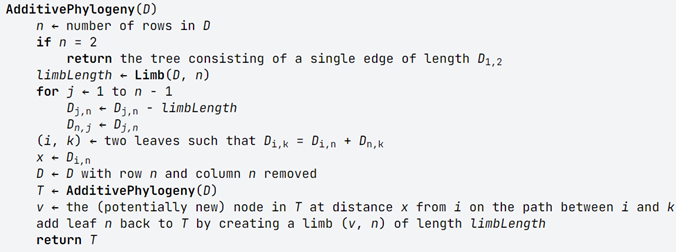

In [2]:
def text_to_list(dis_matrix):
  dis_leaves = []
  for l in dis_matrix.split('\n'):
    dis_leaves.append(list(map(int,l.split(' '))))
  return dis_leaves  

In [7]:
def add_phylogeny(n,dis_leaves,x):
  result = []
  if n == 2:  return dis_leaves, x
  limb_len = limb_length(n,n-1,dis_matrix)  
  for j in range(0,n-1):
    dis_leaves[j][n-1] = dis_leaves[j][n-1] - limb_len
    dis_leaves[n-1][j] = dis_leaves[j][n-1]
    x[j][n-1] = dis_leaves[j][n-1] - limb_length(n,j,dis_matrix)
  dis_leaves.remove(dis_leaves[-1])
  dis_leaves = np.array(dis_leaves).T.tolist()  
  dis_leaves.remove(dis_leaves[-1])

  return add_phylogeny(n-1,dis_leaves,x)

In [8]:
dis_matrix = '''0 13 21 22
13 0 12 13
21 12 0 13
22 13 13 0'''
x = np.zeros((4,4),dtype='object')
dis_leaves = text_to_list(dis_matrix)
add_phylogeny(4,dis_leaves,x)

([[0, 13], [13, 0]], array([[0, 0, 4, 4],
        [0, 0, 4, 4],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=object))